<a href="https://colab.research.google.com/github/mart1krasco/stellantishmm/blob/main/Financial_Econometrics_STLA_PROJECT_FINAL_VERSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the most basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read Stellantis historical data

data = pd.read_excel("STLA data.xlsx")

In [ ]:
#Inspect Data
data.head()

,Date,Price,Open,High,Low,Volume
0,"Jun 13, 2025",9.70,9.81,9.87,9.65,21776300
1,"Jun 12, 2025",10.12,10.13,10.25,10.05,14697100
2,"Jun 11, 2025",10.31,10.44,10.49,10.29,14675600
3,"Jun 10, 2025",10.43,10.21,10.50,10.13,22183000
4,"Jun 9, 2025",9.96,9.92,10.02,9.91,8817100


In [ ]:
print(data["Price"])

0        9.70
1       10.12
2       10.31
3       10.43
4        9.96
        ...  
3772     2.88
3773     2.88
3774     2.88
3775     2.88
3776     2.88
Name: Price, Length: 3777, dtype: float64


In [ ]:
data.describe()

,Price,Open,High,Low
count,3777.000000,3777.000000,3777.000000,3777.000000
mean,11.633876,11.640768,11.736225,11.531432
std,5.997923,6.002368,6.058634,5.938571
min,2.800000,2.800000,2.800000,2.800000
25%,6.510000,6.490000,6.550000,6.480000
50%,10.980000,10.980000,11.080000,10.860000
75%,16.370000,16.370000,16.500000,16.240000
max,29.400000,29.420000,29.510000,29.080000


In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
# Sort the data by date in ascending order
data = data.sort_values('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3777 entries, 3776 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3777 non-null   datetime64[ns]
 1   Price   3777 non-null   float64       
 2   Open    3777 non-null   float64       
 3   High    3777 non-null   float64       
 4   Low     3777 non-null   float64       
 5   Volume  3777 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 206.6+ KB


In [ ]:
data.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Volume,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume'], dtype='object')

In [ ]:
#Question 1: Calculate Arithmetic Returns & Create a new column with results

data['Arithmetic_Returns'] = data['Price'].pct_change()

data.tail()

,Date,Price,Open,High,Low,Volume,Arithmetic_Returns
3772,"Jun 15, 2010",2.88,2.88,2.88,2.88,-,0.0
3773,"Jun 14, 2010",2.88,2.88,2.88,2.88,-,0.0
3774,"Jun 11, 2010",2.88,2.88,2.88,2.88,-,0.0
3775,"Jun 10, 2010",2.88,2.88,2.88,2.88,-,0.0
3776,"Jun 9, 2010",2.88,2.88,2.88,2.88,-,0.0


In [ ]:
#Question 1: Calculate Logarithmic Returns & Create a new column with results
data['Log_Returns'] = np.log(data['Price'] / data['Price'].shift(1))
data.tail()

,Date,Price,Open,High,Low,Volume,Arithmetic_Returns,Log_Returns
3772,"Jun 15, 2010",2.88,2.88,2.88,2.88,-,0.0,0.0
3773,"Jun 14, 2010",2.88,2.88,2.88,2.88,-,0.0,0.0
3774,"Jun 11, 2010",2.88,2.88,2.88,2.88,-,0.0,0.0
3775,"Jun 10, 2010",2.88,2.88,2.88,2.88,-,0.0,0.0
3776,"Jun 9, 2010",2.88,2.88,2.88,2.88,-,0.0,0.0


In [ ]:
print(data[['Date', 'Price', 'Arithmetic_Returns', 'Log_Returns']].head())

           Date  Price  Arithmetic_Returns  Log_Returns
3776 2010-06-09   2.88                 NaN          NaN
3775 2010-06-10   2.88                 0.0          0.0
3774 2010-06-11   2.88                 0.0          0.0
3773 2010-06-14   2.88                 0.0          0.0
3772 2010-06-15   2.88                 0.0          0.0


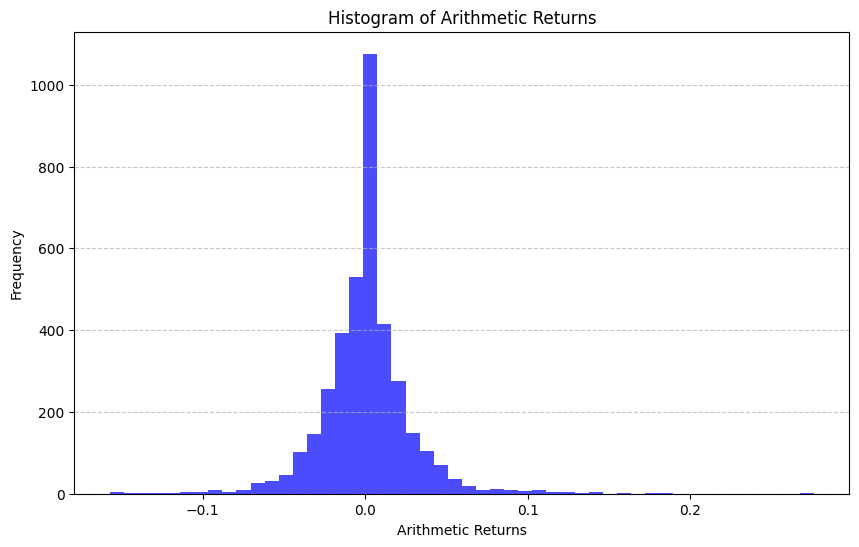

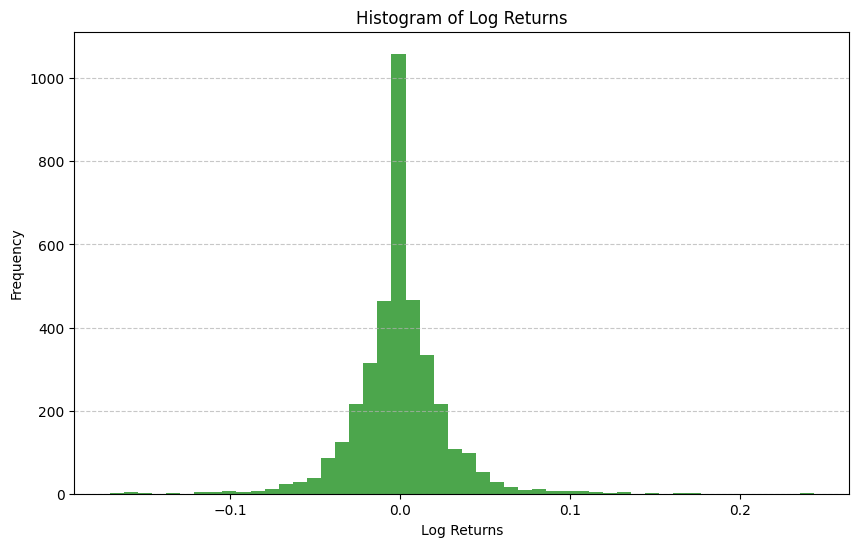

In [ ]:

# Plot histogram for Arithmetic Returns
plt.figure(figsize=(10, 6))
plt.hist(data['Arithmetic_Returns'].dropna(), bins=50, alpha=0.7, color='blue')
plt.title('Histogram of Arithmetic Returns')
plt.xlabel('Arithmetic Returns')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot histogram for Log Returns
plt.figure(figsize=(10, 6))
plt.hist(data['Log_Returns'].dropna(), bins=50, alpha=0.7, color='green')
plt.title('Histogram of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

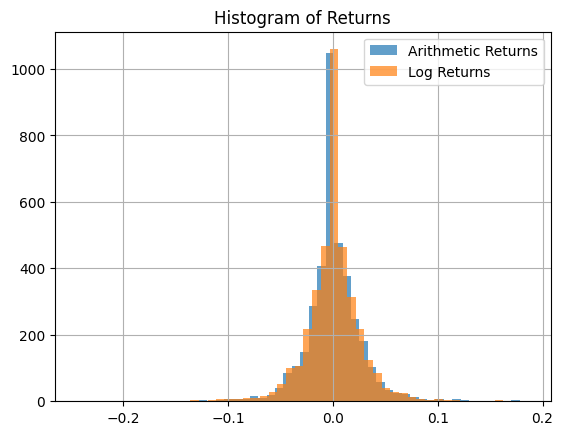

In [ ]:
# Plot to compare histograms of returns
data['Arithmetic_Returns'].hist(bins=50, alpha=0.7, label='Arithmetic Returns')
data['Log_Returns'].hist(bins=50, alpha=0.7, label='Log Returns')
plt.title('Histogram of Returns')
plt.legend()
plt.show()

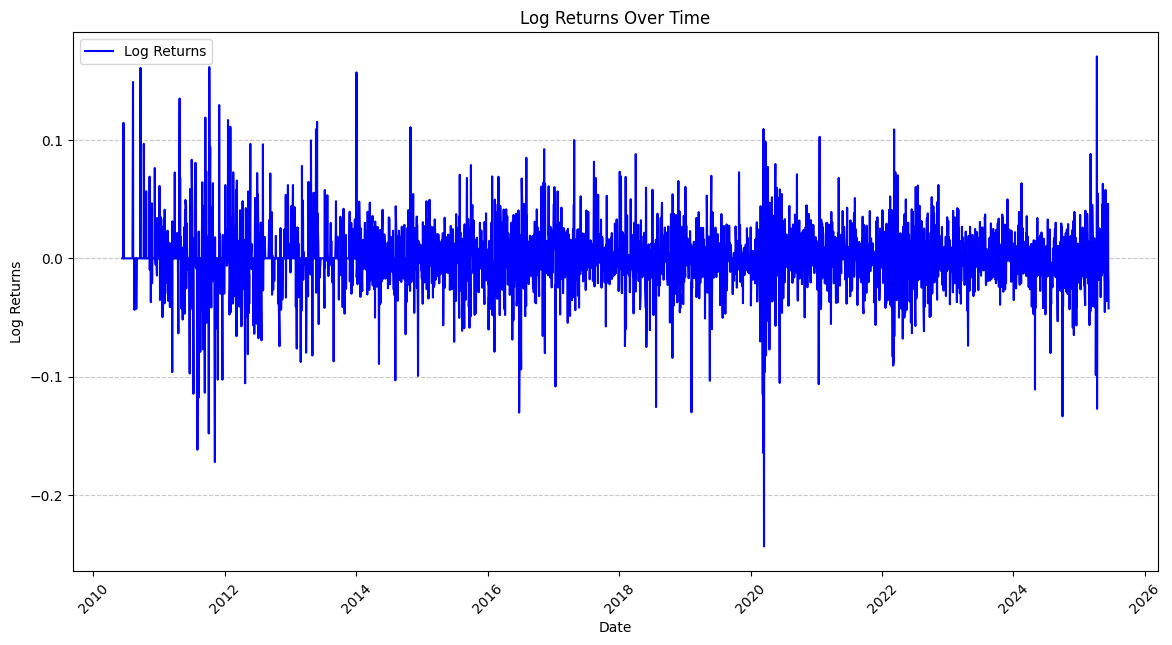

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Log_Returns'], label='Log Returns', color='blue')
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

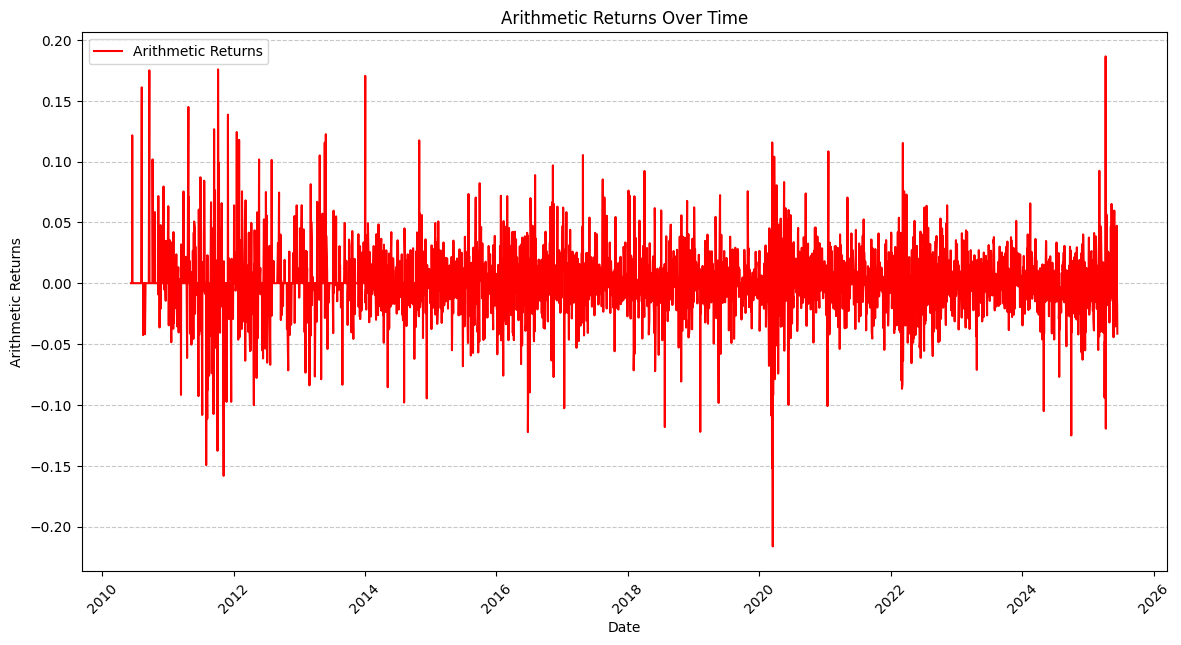

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Arithmetic_Returns'], label='Arithmetic Returns', color='red')
plt.title('Arithmetic Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Arithmetic Returns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
#Check differences
difference = data['Arithmetic_Returns'] - data['Log_Returns']


if difference.abs().sum() == 0:
    print("The two returns are identical.")
else:
    print("The two returns are not identical. Here's the sum of differences:", difference.abs().sum())


The two returns are not identical. Here's the sum of differences: 1.3903357811863968


In [ ]:
data.head()

,Date,Price,Open,High,Low,Volume,Arithmetic_Returns,Log_Returns
3776,2010-06-09,2.88,2.88,2.88,2.88,-,NaN,NaN
3775,2010-06-10,2.88,2.88,2.88,2.88,-,0.0,0.0
3774,2010-06-11,2.88,2.88,2.88,2.88,-,0.0,0.0
3773,2010-06-14,2.88,2.88,2.88,2.88,-,0.0,0.0
3772,2010-06-15,2.88,2.88,2.88,2.88,-,0.0,0.0


In [ ]:
#Daily Volatility
daily_volatility = data['Log_Returns'].std()
print(f"Daily Volatility: {daily_volatility:.6f}")


Daily Volatility: 0.027102


In [ ]:
#Square root of time
annualized_volatility = daily_volatility * np.sqrt(252)
print(f"Annualized Volatility: {annualized_volatility:.6f}")

Annualized Volatility: 0.430232


In [ ]:
data['Rolling_Daily_Volatility'] = data['Log_Returns'].rolling(window=40).std()

# Annualize the rolling volatility
data['Rolling_Annualized_Volatility'] = data['Rolling_Daily_Volatility'] * np.sqrt(252)

# Display the first few rows with rolling volatility
print(data[['Date', 'Rolling_Daily_Volatility', 'Rolling_Annualized_Volatility']].tail())

              Date  Rolling_Daily_Volatility  Rolling_Annualized_Volatility
3772  Jun 15, 2010                  0.029393                       0.466606
3773  Jun 14, 2010                  0.029393                       0.466606
3774  Jun 11, 2010                  0.029393                       0.466606
3775  Jun 10, 2010                  0.018134                       0.287874
3776   Jun 9, 2010                  0.018134                       0.287874


In [ ]:
# Convert rolling volatility to percentage
data['Rolling_Daily_Volatility_Percent'] = data['Rolling_Daily_Volatility'] * 100
data['Rolling_Annualized_Volatility_Percent'] = data['Rolling_Annualized_Volatility'] * 100

# Display the most recent volatility value
latest_volatility = data['Rolling_Annualized_Volatility_Percent'].dropna().iloc[-1]
print(f"Latest 40-day annualized volatility: {latest_volatility:.2f}%")

Latest 40-day annualized volatility: 28.79%


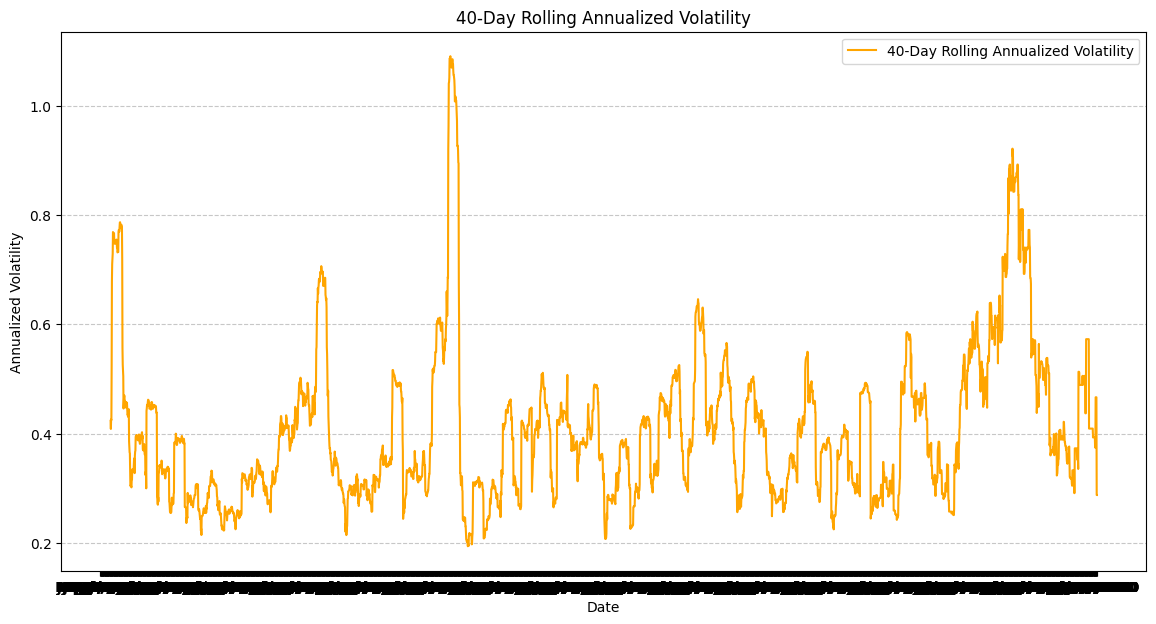

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Rolling_Annualized_Volatility'], label='40-Day Rolling Annualized Volatility', color='orange')
plt.title('40-Day Rolling Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
#Alt way for Skew
from scipy.stats import skew

log_returns_skewness = skew(data['Log_Returns'].dropna())
print(f"Skewness of Log Returns: {log_returns_skewness:.6f}")

Skewness of Log Returns: -0.262300


In [ ]:
#Skewness
sk=data['Log_Returns'].skew()
print(sk)

-0.26240418161251966


In [ ]:
#Alt way for Kurtosis
from scipy.stats import kurtosis

log_returns_kurtosis = kurtosis(data['Log_Returns'].dropna(), fisher=True)
print(f"Kurtosis of Log Returns (Excess): {log_returns_kurtosis:.6f}")

Kurtosis of Log Returns (Excess): 7.451395


In [ ]:
#Kurtosis
kt=data["Log_Returns"].kurt()
print(kt)

7.462861657639916


In [ ]:
#semi-deviation metric possible method
sd= data[data["Log_Returns"] < data["Log_Returns"].mean()]["Log_Returns"].std()
print(sd)

0.02075408568216827


In [ ]:
#Alternative Method for Semi-Deviation
#Only the returns below the mea: Measures what's the distance of negative returns to the mean.
mean_return = data['Log_Returns'].mean()
negative_returns = data['Log_Returns'][data['Log_Returns'] < mean_return]
semi_deviation = negative_returns.std()
print(f"Semi-Deviation of Log Returns: {semi_deviation:.6f}")

Semi-Deviation of Log Returns: 0.020754


In [ ]:
#VaR(Value at risk 95)(99 in this case)--> tail to be defined as lowest 1% of observations

value_at_risk_95= data["Log_Returns"].quantile(0.01)
print(value_at_risk_95)

-0.08221037744082768


In [ ]:
#JB test
n = len(data['Log_Returns'].dropna())

jb_statistic = 764 / 6 * (sk**2 + (kt - 3)**2 / 4)


from numpy import exp
from numpy import pi
from numpy import sqrt

# Degrees of freedom for JB test is 2

# Approximation for chi-square distribution p-value
from scipy.stats import chi2

# Degrees of freedom for JB test
df = 2

# Compute p-value manually
p_value_manual = 1 - chi2.cdf(jb_statistic, df)

# Print the results
print(f"Jarque-Bera Test Statistic: {jb_statistic:.6f}")
print(f"P-value (approximation): {p_value_manual:.6f}")

# Interpretation
if p_value_manual < 0.05:
    print("Reject the null hypothesis: The returns do NOT follow a Normal distribution.")
else:
    print("Fail to reject the null hypothesis: The returns MAY follow a Normal distribution.")


Jarque-Bera Test Statistic: 642.796429
P-value (approximation): 0.000000
Reject the null hypothesis: The returns do NOT follow a Normal distribution.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

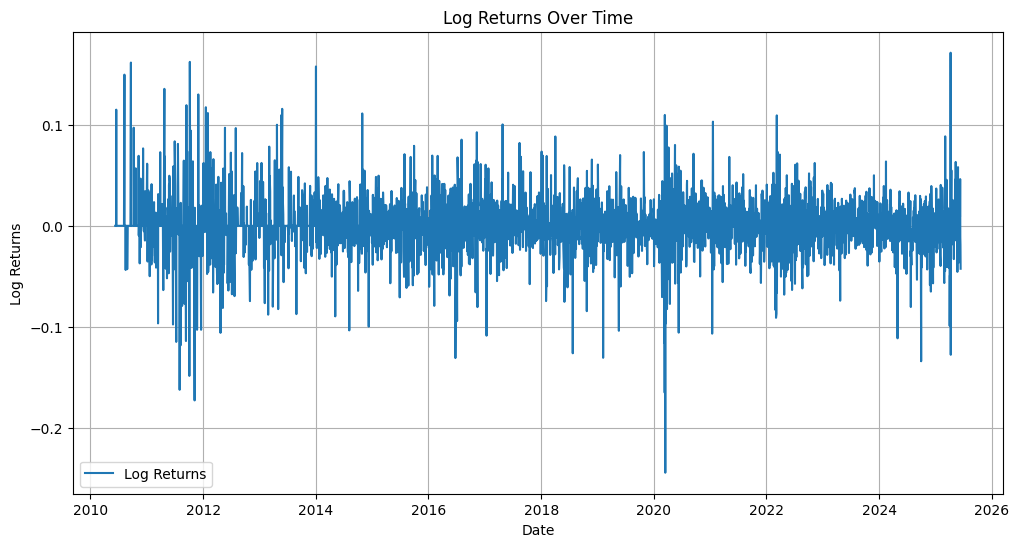

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Log_Returns'], label='Log Returns')
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(data['Log_Returns'].dropna())
print(f"ADF Statistic: {adf_test[0]:.6f}")
print(f"P-value: {adf_test[1]:.6f}")

if adf_test[1] < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is NOT stationary (fail to reject the null hypothesis).")

ADF Statistic: -30.307330
P-value: 0.000000
The time series is stationary (reject the null hypothesis).


<Figure size 1200x600 with 0 Axes>

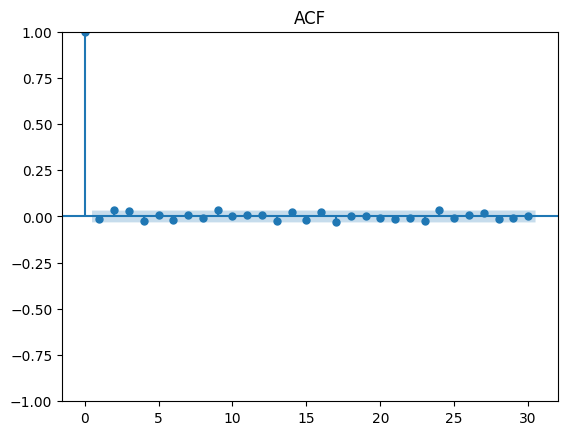

<Figure size 1200x600 with 0 Axes>

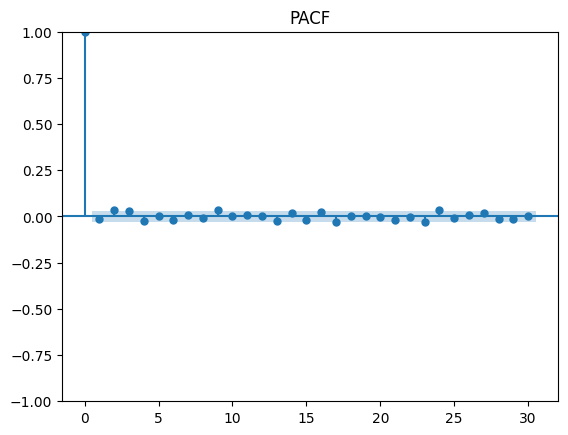

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(data['Log_Returns'].dropna(), lags=30, title='ACF')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Log_Returns'].dropna(), lags=30, title='PACF')
plt.show()

In [ ]:
#Train test split
cutoff_test=int(len(data["Log_Returns"]*0.8))
r_train=data["Log_Returns"].iloc[:cutoff_test]
r_test=data["Log_Returns"].iloc[cutoff_test:]

In [ ]:
# Fit ARMA(1,1) model
model = ARIMA(data['Log_Returns'].dropna(), order=(1, 0, 1))
arma_result = model.fit()

# Print the summary
print(arma_result.summary())

#Interpetation: Low P-Values= Significant Coefficients--> Only sigma is significant as the P value tends to zero. All others are not significant

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Log_Returns   No. Observations:                 3776
Model:                 ARIMA(1, 0, 1)   Log Likelihood                8266.948
Date:                Wed, 20 Aug 2025   AIC                         -16525.897
Time:                        14:23:51   BIC                         -16500.951
Sample:                             0   HQIC                        -16517.028
                               - 3776                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.693      0.488      -0.001       0.001
ar.L1          0.3624     25.356      0.014      0.989     -49.334      50.059
ma.L1         -0.3621     25.359     -0.014      0.9

<Axes: >

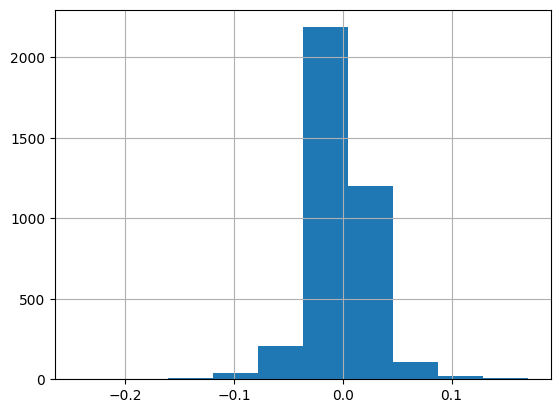

In [ ]:
#Form predictions, compute residuals
r_pred=arma_result.predict()
r_train_resid=arma_result.resid
r_train_resid.hist()

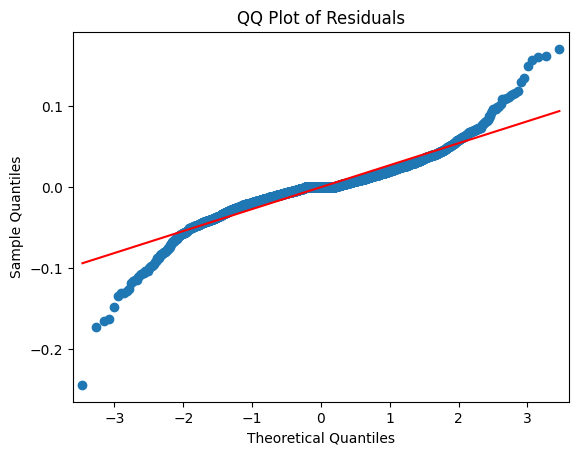

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(r_train_resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

In [ ]:
#GARCH

!pip install arch
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 5.8 MB/s eta 0:00:00


<Axes: >

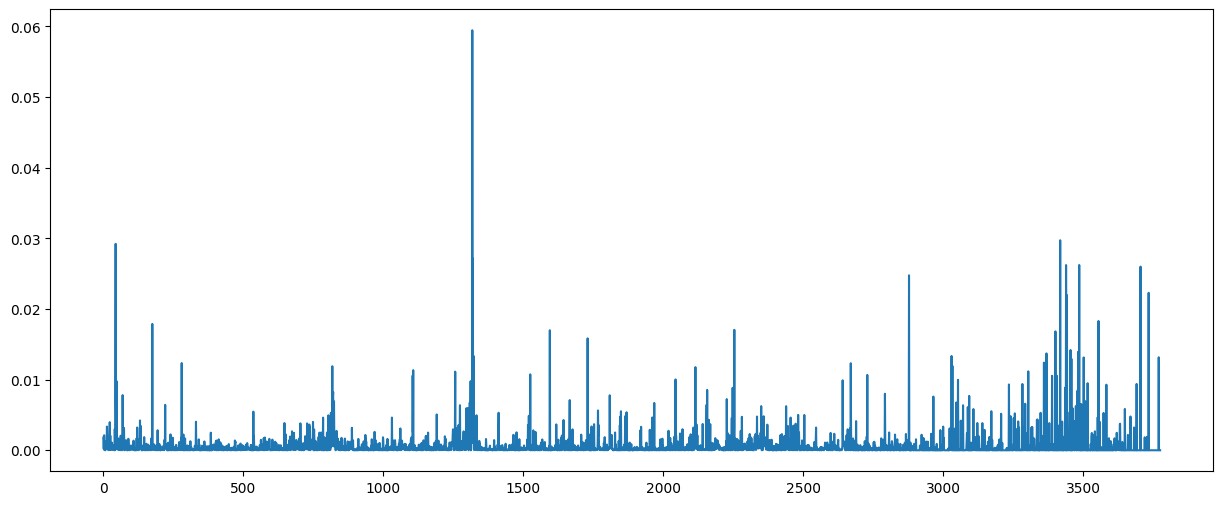

In [ ]:
#Plot squared returns
#Why: squared returns are proxy for volatilty
#and they help to identify volatility clustering in data
fig,ax=plt.subplots(figsize=(15,6))
(data["Log_Returns"]**2).plot(ax=ax)

<Figure size 1200x600 with 0 Axes>

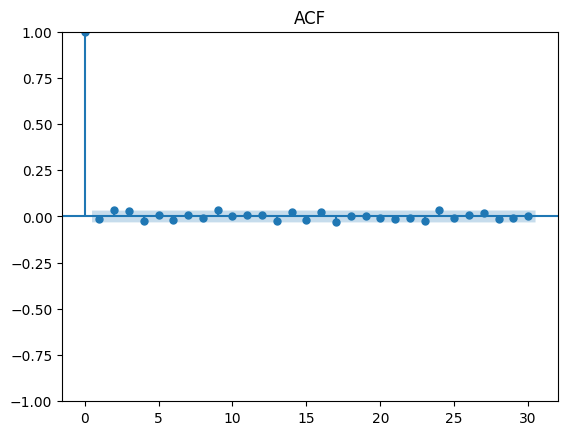

<Figure size 1200x600 with 0 Axes>

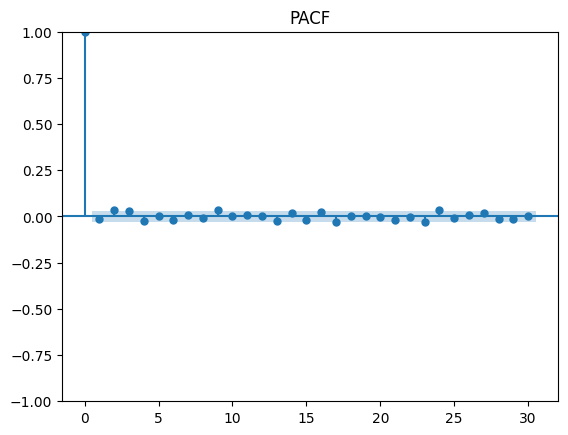

In [ ]:
#plot ACF
#no signigicant lags indicate low volatility clustering
plt.figure(figsize=(12, 6))
plot_acf(data['Log_Returns'].dropna(), lags=30, title='ACF')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Log_Returns'].dropna(), lags=30, title='PACF')
plt.show()

In [ ]:
cutoff=int(len(data["Log_Returns"])*0.8)
data_train=data["Log_Returns"].iloc[:cutoff]

In [ ]:
print(data['Log_Returns'].isna().sum())  # Check for NaNs in the original dataset
print(np.isfinite(data['Log_Returns']).all())  # Check for infinite values in the original dataset

# Step 2: Clean the data by removing NaN and infinite values
data_train = data["Log_Returns"].iloc[:cutoff]  # Using your cutoff point
data_train = data_train.dropna()  # Drop any NaN values
data_train = data_train[np.isfinite(data_train)]  # Drop any infinite values

# Step 3: Verify that the data is clean
print(data_train.isna().sum())  # Ensure no NaNs
print(np.isfinite(data_train).all())  # Ensure no infinite values
print(data_train.shape)  # Check the shape of the cleaned dataset

# Step 4: Fit the GARCH model
from arch import arch_model
model = arch_model(data_train, p=1, q=1, rescale=False).fit(disp=0)

# Step 5: Check the model output
print(model.summary())

1
False
0
True
(3020,)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6639.22
Distribution:                  Normal   AIC:                          -13270.4
Method:            Maximum Likelihood   BIC:                          -13246.4
                                        No. Observations:                 3020
Date:                Wed, Aug 20 2025   Df Residuals:                     3019
Time:                        14:24:08   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.4885e-04  4.754e-04

In [ ]:
#One-day forecast of the volatility
garch_forecast=model.forecast(horizon=1,reindex=False).variance
garch_forecast.iloc[0,0]**0.5

np.float64(0.02548689957694252)

In [ ]:
#Validation: walk-forward
predictions=[]
test_size=int(len(data["Log_Returns"])*0.2)
df_test_data=data["Log_Returns"].iloc[test_size:]
test_size

755

In [ ]:
# Import Dependencies
import numpy as np
import seaborn as sns # To graph
import matplotlib.pyplot as plt # Summarize simmulation plot
!pip install py_vollib_vectorized
from py_vollib_vectorized import vectorized_implied_volatility as implied_vol

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for py-vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62833 sha256=701e9472621e77c33c2cb2d8bc5787375f81df8b9b0b4c7a429c6d1e9dedb27b
  Stored in directory: /root/.cache/pip/wheels/5f/8c/ab/bbc3a2b0e6ae83633bb99f960459a2ab960b4672c7440ff4ef
  Created wheel for py-lets-be-rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24451 sha256=8808f9c98abd94cbf95caa153100c12d535f3426a01e365ceb899f3ae73c5957
  Stored in directory: /root/.cache/pip/wheels/c3/c6/50/415aabc2033e7651cc8cc590bd01c5f23f9050328f6016d6a5
Successfully built py-vollib py-lets-be-rational


In [ ]:
data["Log_Returns"]

,Log_Returns
3776,NaN
3775,0.000000
3774,0.000000
3773,0.000000
3772,0.000000
...,...
4,0.009077
3,0.046109
2,-0.011572
1,-0.018601


In [ ]:
Log_Return_762 = data["Log_Returns"].iloc[1]

data = data.drop(index=763)

In [ ]:
data.loc[762, 'Log_Returns'] = Log_Return_762
data["Log_Returns"]

,Log_Returns
3776,NaN
3775,0.000000
3774,0.000000
3773,0.000000
3772,0.000000
...,...
4,0.009077
3,0.046109
2,-0.011572
1,-0.018601


In [ ]:
data

,Date,Price,Open,High,Low,Volume,Arithmetic_Returns,Log_Returns,Rolling_Daily_Volatility,Rolling_Annualized_Volatility,Rolling_Daily_Volatility_Percent,Rolling_Annualized_Volatility_Percent
3776,2010-06-09,2.88,2.88,2.88,2.88,-,NaN,NaN,NaN,NaN,NaN,NaN
3775,2010-06-10,2.88,2.88,2.88,2.88,-,0.000000,0.000000,NaN,NaN,NaN,NaN
3774,2010-06-11,2.88,2.88,2.88,2.88,-,0.000000,0.000000,NaN,NaN,NaN,NaN
3773,2010-06-14,2.88,2.88,2.88,2.88,-,0.000000,0.000000,NaN,NaN,NaN,NaN
3772,2010-06-15,2.88,2.88,2.88,2.88,-,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-06-09,9.96,9.92,10.02,9.91,8817100,0.009119,0.009077,0.033062,0.524851,3.306249,52.485071
3,2025-06-10,10.43,10.21,10.50,10.13,22183000,0.047189,0.046109,0.026760,0.424810,2.676049,42.480955
2,2025-06-11,10.31,10.44,10.49,10.29,14675600,-0.011505,-0.011572,0.026841,0.426086,2.684091,42.608619
1,2025-06-12,10.12,10.13,10.25,10.05,14697100,-0.018429,-0.018601,0.025747,0.408720,2.574692,40.871971


In [ ]:
# Define parameters

S0 = data["Price"].loc[0]  # Initial asset price
print(S0)
T = 1     # Time to maturity in years
r = 0.0461    # Risk-free interest rate ; 10 Year Treasury Rate is at 4.61%
N = 252     # Number of time steps in the simulation ; we took the number of trading days in a year
M = 100000  # Number of Monte Carlo simulations
kappa = 3  # Rate of mean reversion of variance under risk-neutral dynamics

import numpy as np
prices = data["Price"]
hist_vol = data['Log_Returns'].std() * np.sqrt(252)
data['Variance'] = data['Rolling_Annualized_Volatility'] ** 2
data['Variance_Change'] = data['Variance'].diff()

theta = hist_vol**2  # Long-term average variance

recent_vol = data['Log_Returns'].tail(252).std() * np.sqrt(252)  # 1-year volatility
v0 = recent_vol ** 2    # Most recent variance

rho = data["Log_Returns"].corr(data['Variance_Change'])

# Correlation between returns and variances under risk-neutral dynamics

daily_sigma = data['Variance_Change'].std() # Volatility of volatility ;

annualized_sigma = daily_sigma * np.sqrt(252)  # Annualize

print(f"Long-Term Variance (theta): {theta:.4f}")
print(f"Initial Variance (v0): {v0:.4f}")
print(f"Correlation (rho): {rho:.4f}")
print(f"Annualized Sigma (vol-of-vol): {annualized_sigma:.4f}")

print(f"\nInterpretation for Readers:")
print(f"Long-Term Annualized Volatility: {np.sqrt(theta):.2%}")
print(f"Starting Annualized Volatility: {np.sqrt(v0):.2%}")

9.7
Long-Term Variance (theta): 0.1851
Initial Variance (v0): 0.1811
Correlation (rho): 0.0314
Annualized Sigma (vol-of-vol): 0.3135

Interpretation for Readers:
Long-Term Annualized Volatility: 43.02%
Starting Annualized Volatility: 42.56%


In [ ]:
# Monte Carlo Simulation

import numpy as np

def heston_model_sim(S0, v0, rho, kappa, theta, sigma, T, N, M):
    # Time step
    dt = T / N # The time step Δt is the total simulation time T divided by the number of steps N. This determines how finely the paths are simulated

    # Mean and covariance for Brownian motions
    mu = np.array([0, 0]) # The mean vector (zero) for the two Brownian motions (=any of various physical phenomena in which some quantity is constantly
                          # undergoing small, random fluctuations)
    cov = np.array([[1, rho], [rho, 1]]) # Variance for each Brownian motion is 1. ρ: Correlation between the two Brownian motions.
                                        # This ensures the randomness in asset prices (Z1) and variance (Z2) is correlated.

    # Initialize arrays for asset prices and variances
    S = np.full(shape=(N+1,M), fill_value=S0)

    v = np.full(shape=(N+1,M), fill_value=v0)

    # What it represents: Each row corresponds to a specific time step in the simulation.
    # Why from 0 to N: The simulation starts at t=0, which is the initial time
    # The simulation progresses in N discrete time steps, with each step corresponding to dt=T/N, where
    # T is the total simulation time. The final row (N) corresponds to the end of the simulation period (T).
    # Why from 1 to M: We perform Monte Carlo simulations to model many possible paths for the asset price and variance.
    # M is the total number of simulations, and each simulation produces a unique path due to randomness.

    Z = np.random.multivariate_normal(mu,cov,(N,M)) # sampling correlated brownian motions under risk-neutral measure for each time step and each simulation.

    for i in range(1,N+1):
      S[i]=S[i-1]*np.exp((r-0.5*v[i-1])*dt+np.sqrt(v[i-1]*dt)*Z[i-1,:,0]) # Updating Asset Prices
      v[i] = np.maximum(v[i-1]+ kappa * (theta - v[i-1]) * dt + sigma * np.sqrt(v[i-1] * dt) * Z[i-1,:,1],0) # Updating Variance
      # np.maximum ensures that our variance remains non-negative, as variance cannot be less than 0.

    return S, v
    # Simulated asset price paths over time
    # Simulated variance paths over time

In [ ]:
rho_p=0.9
rho_n=-0.9

# Simulate the Heston model with two different correlation parameters
S_p, v_p = heston_model_sim(S0, v0, rho_p, kappa, theta, annualized_sigma, T, N, M)  # Positive correlation (rho_p)
# Simulates a scenario where the asset price changes and variance are strongly positively correlated
# Interpretation: If the asset price increases, variance (volatility) also tends to increase, which is less common in equities

S_n, v_n = heston_model_sim(S0, v0, rho_n, kappa, theta, annualized_sigma, T, N, M)  # Negative correlation (rho_n)
# Simulates a scenario where the asset price changes and variance are strongly negatively correlated
# Interpretation: If the asset price increases, variance (volatility) tends to decrease. This reflects the leverage effect, which is common in stocks:
# When stock prices drop, companies are perceived as riskier, leading to higher volatility.


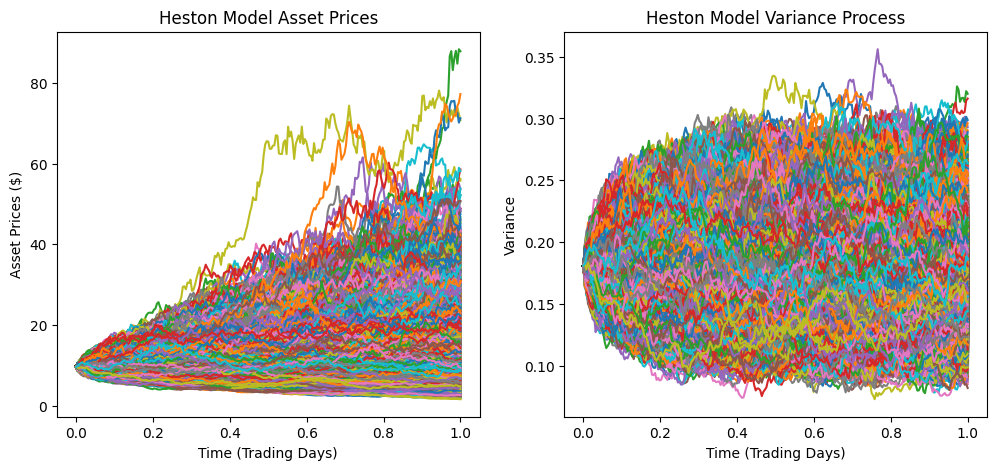

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a time array for plotting
time = np.linspace(0, T, N + 1)
# Generates N+1 evenly spaced time points between 0 (start) and T (end of the simulation).
# N+1 ensures that we have time points corresponding to all rows of the simulated arrays S_p and v_p.

# Create subplots for asset prices and variance process
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Creates a figure with two subplots (ax1 and ax2) arranged side-by-side (1 row, 2 columns).

# Plot asset prices
ax1.plot(time, S_p)
ax1.set_title('Heston Model Asset Prices')
ax1.set_xlabel('Time (Trading Days)')
ax1.set_ylabel('Asset Prices ($)')

# Plot variance process
ax2.plot(time, v_p)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time (Trading Days)')
ax2.set_ylabel('Variance')

# Show the plots
plt.show()

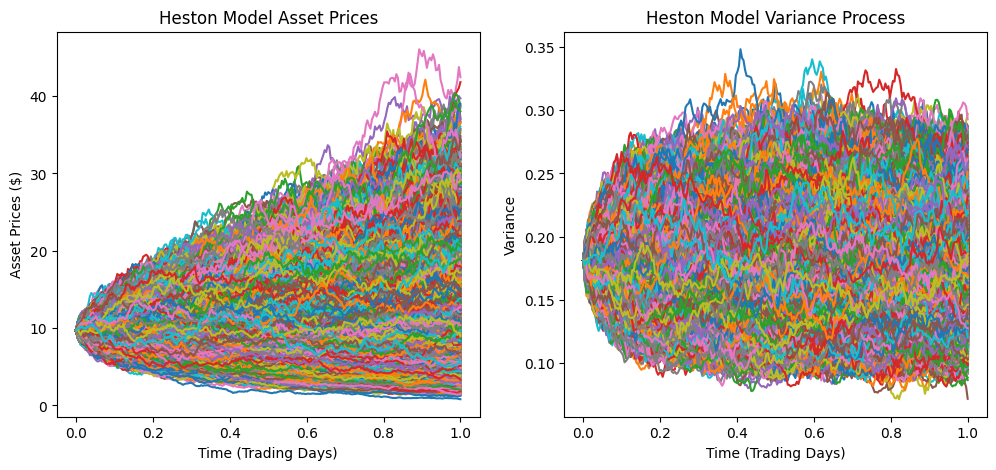

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a time array for plotting
time = np.linspace(0, T, N + 1)
# Generates N+1 evenly spaced time points between 0 (start) and T (end of the simulation).
#N+1 ensures that we have time points corresponding to all rows of the simulated arrays S_p and v_p.

# Create subplots for asset prices and variance process
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Creates a figure with two subplots (ax1 and ax2) arranged side-by-side (1 row, 2 columns).

# Plot asset prices
ax1.plot(time, S_n)
ax1.set_title('Heston Model Asset Prices')
ax1.set_xlabel('Time (Trading Days)')
ax1.set_ylabel('Asset Prices ($)')

# Plot variance process
ax2.plot(time, v_n)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time (Trading Days)')
ax2.set_ylabel('Variance')

# Show the plots
plt.show()

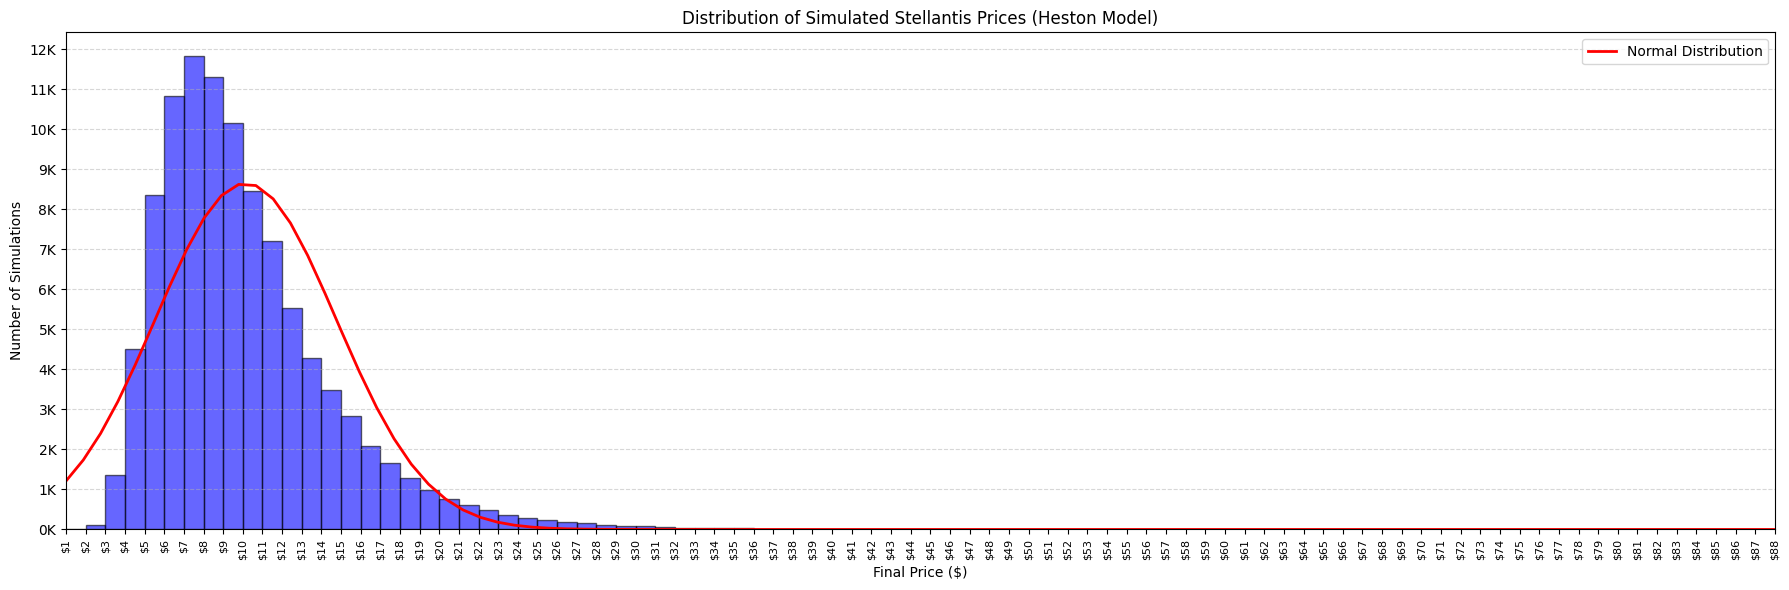

In [ ]:
#POSITIVE RHO
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Simulated final prices
final_prices = S_p[-1, :]

# Calculate ACTUAL min/max prices from your data (ignoring outliers)
min_price = int(np.floor(np.min(final_prices)))
max_price = int(np.ceil(np.max(final_prices)))

# Create a figure
plt.figure(figsize=(18, 6))

# Plot histogram
counts, bins, _ = plt.hist(
    final_prices,
    bins=np.arange(min_price, max_price + 1, 1),
    density=False,  # Show counts, not density
    alpha=0.6,
    color='blue',
    edgecolor='black'
)

# Normal distribution curve
mu, std = np.mean(final_prices), np.std(final_prices)
x = np.linspace(min_price, max_price, 100)  # Align with actual data range
plt.plot(
    x,
    norm.pdf(x, mu, std) * len(final_prices) * (bins[1] - bins[0]),
    'r-',
    lw=2,
    label='Normal Distribution'
)

# Format x-axis
plt.xticks(
    ticks=np.arange(min_price, max_price + 1, 1),
    labels=[f'${x}' for x in np.arange(min_price, max_price + 1, 1)],
    rotation=90,
    fontsize=8
)
plt.xlim(min_price, max_price)
plt.xlabel('Final Price ($)')

# Format y-axis
max_count = np.max(counts)
plt.yticks(
    ticks=np.arange(0, max_count + 1000, 1000),
    labels=[f'{int(x/1000)}K' for x in np.arange(0, max_count + 1000, 1000)],
    fontsize=10
)
plt.ylabel('Number of Simulations')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Final touches
plt.title('Distribution of Simulated Stellantis Prices (Heston Model)')
plt.legend()
plt.tight_layout()
plt.show()

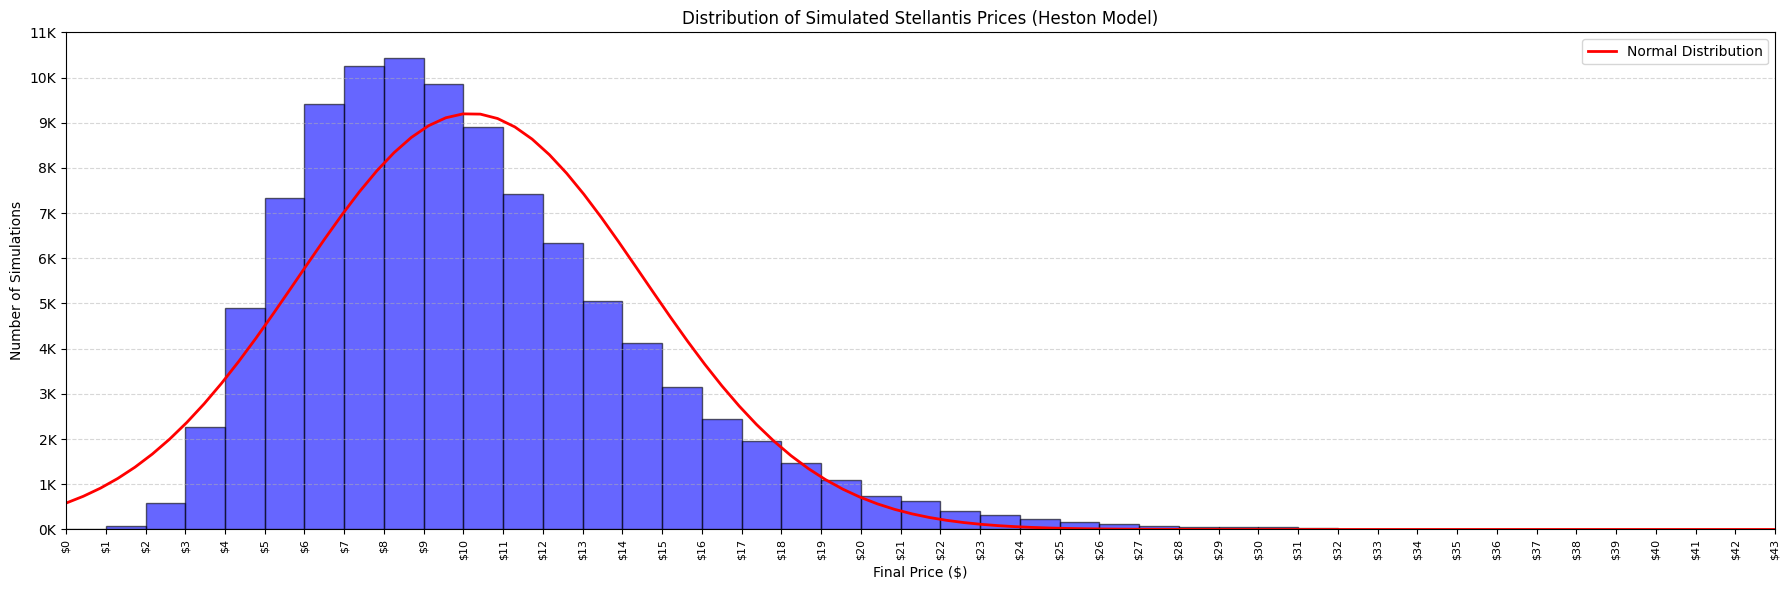

In [ ]:
#NEGATIVE RHO
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Simulated final prices
final_prices = S_n[-1, :]

# Calculate ACTUAL min/max prices from your data (ignoring outliers)
min_price = int(np.floor(np.min(final_prices)))
max_price = int(np.ceil(np.max(final_prices)))

# Create a figure
plt.figure(figsize=(18, 6))

# Plot histogram
counts, bins, _ = plt.hist(
    final_prices,
    bins=np.arange(min_price, max_price + 1, 1),
    density=False,  # Show counts, not density
    alpha=0.6,
    color='blue',
    edgecolor='black'
)

# Normal distribution curve
mu, std = np.mean(final_prices), np.std(final_prices)
x = np.linspace(min_price, max_price, 100)  # Align with actual data range
plt.plot(
    x,
    norm.pdf(x, mu, std) * len(final_prices) * (bins[1] - bins[0]),
    'r-',
    lw=2,
    label='Normal Distribution'
)

# Format x-axis
plt.xticks(
    ticks=np.arange(min_price, max_price + 1, 1),
    labels=[f'${x}' for x in np.arange(min_price, max_price + 1, 1)],
    rotation=90,
    fontsize=8
)
plt.xlim(min_price, max_price)
plt.xlabel('Final Price ($)')

# Format y-axis
max_count = np.max(counts)
plt.yticks(
    ticks=np.arange(0, max_count + 1000, 1000),
    labels=[f'{int(x/1000)}K' for x in np.arange(0, max_count + 1000, 1000)],
    fontsize=10
)
plt.ylabel('Number of Simulations')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Final touches
plt.title('Distribution of Simulated Stellantis Prices (Heston Model)')
plt.legend()
plt.tight_layout()
plt.show()

# Hidden Markov Model

🚀 Starting Stellantis HMM Analysis...
📁 Loading data...
🏭 STELLANTIS N.V. (STLA) HIDDEN MARKOV MODEL ANALYSIS
📈 Loading data...
✅ Loaded STLA data with 3777 rows
Columns: ['Date', 'Price', 'Open', 'High', 'Low', 'Volume']
Date column found: Date
Unique dates before conversion: 3777
STLA data after date conversion:
            Price  Open  High   Low  Volume
Date                                       
2010-06-09   2.88  2.88  2.88  2.88     NaN
2010-06-10   2.88  2.88  2.88  2.88     NaN
2010-06-11   2.88  2.88  2.88  2.88     NaN
2010-06-14   2.88  2.88  2.88  2.88     NaN
2010-06-15   2.88  2.88  2.88  2.88     NaN
Unique dates after conversion: 3777
STLA data date range: 2010-06-09 00:00:00 to 2025-06-13 00:00:00
STLA data after processing:
            Price  Open  High   Low  Volume  Close   Returns  LogReturns
Date                                                                    
2010-06-17   3.23  3.23  3.23  3.23   350.0   3.23  0.121528    0.114692
2010-08-09   3.75  3.75  3.7

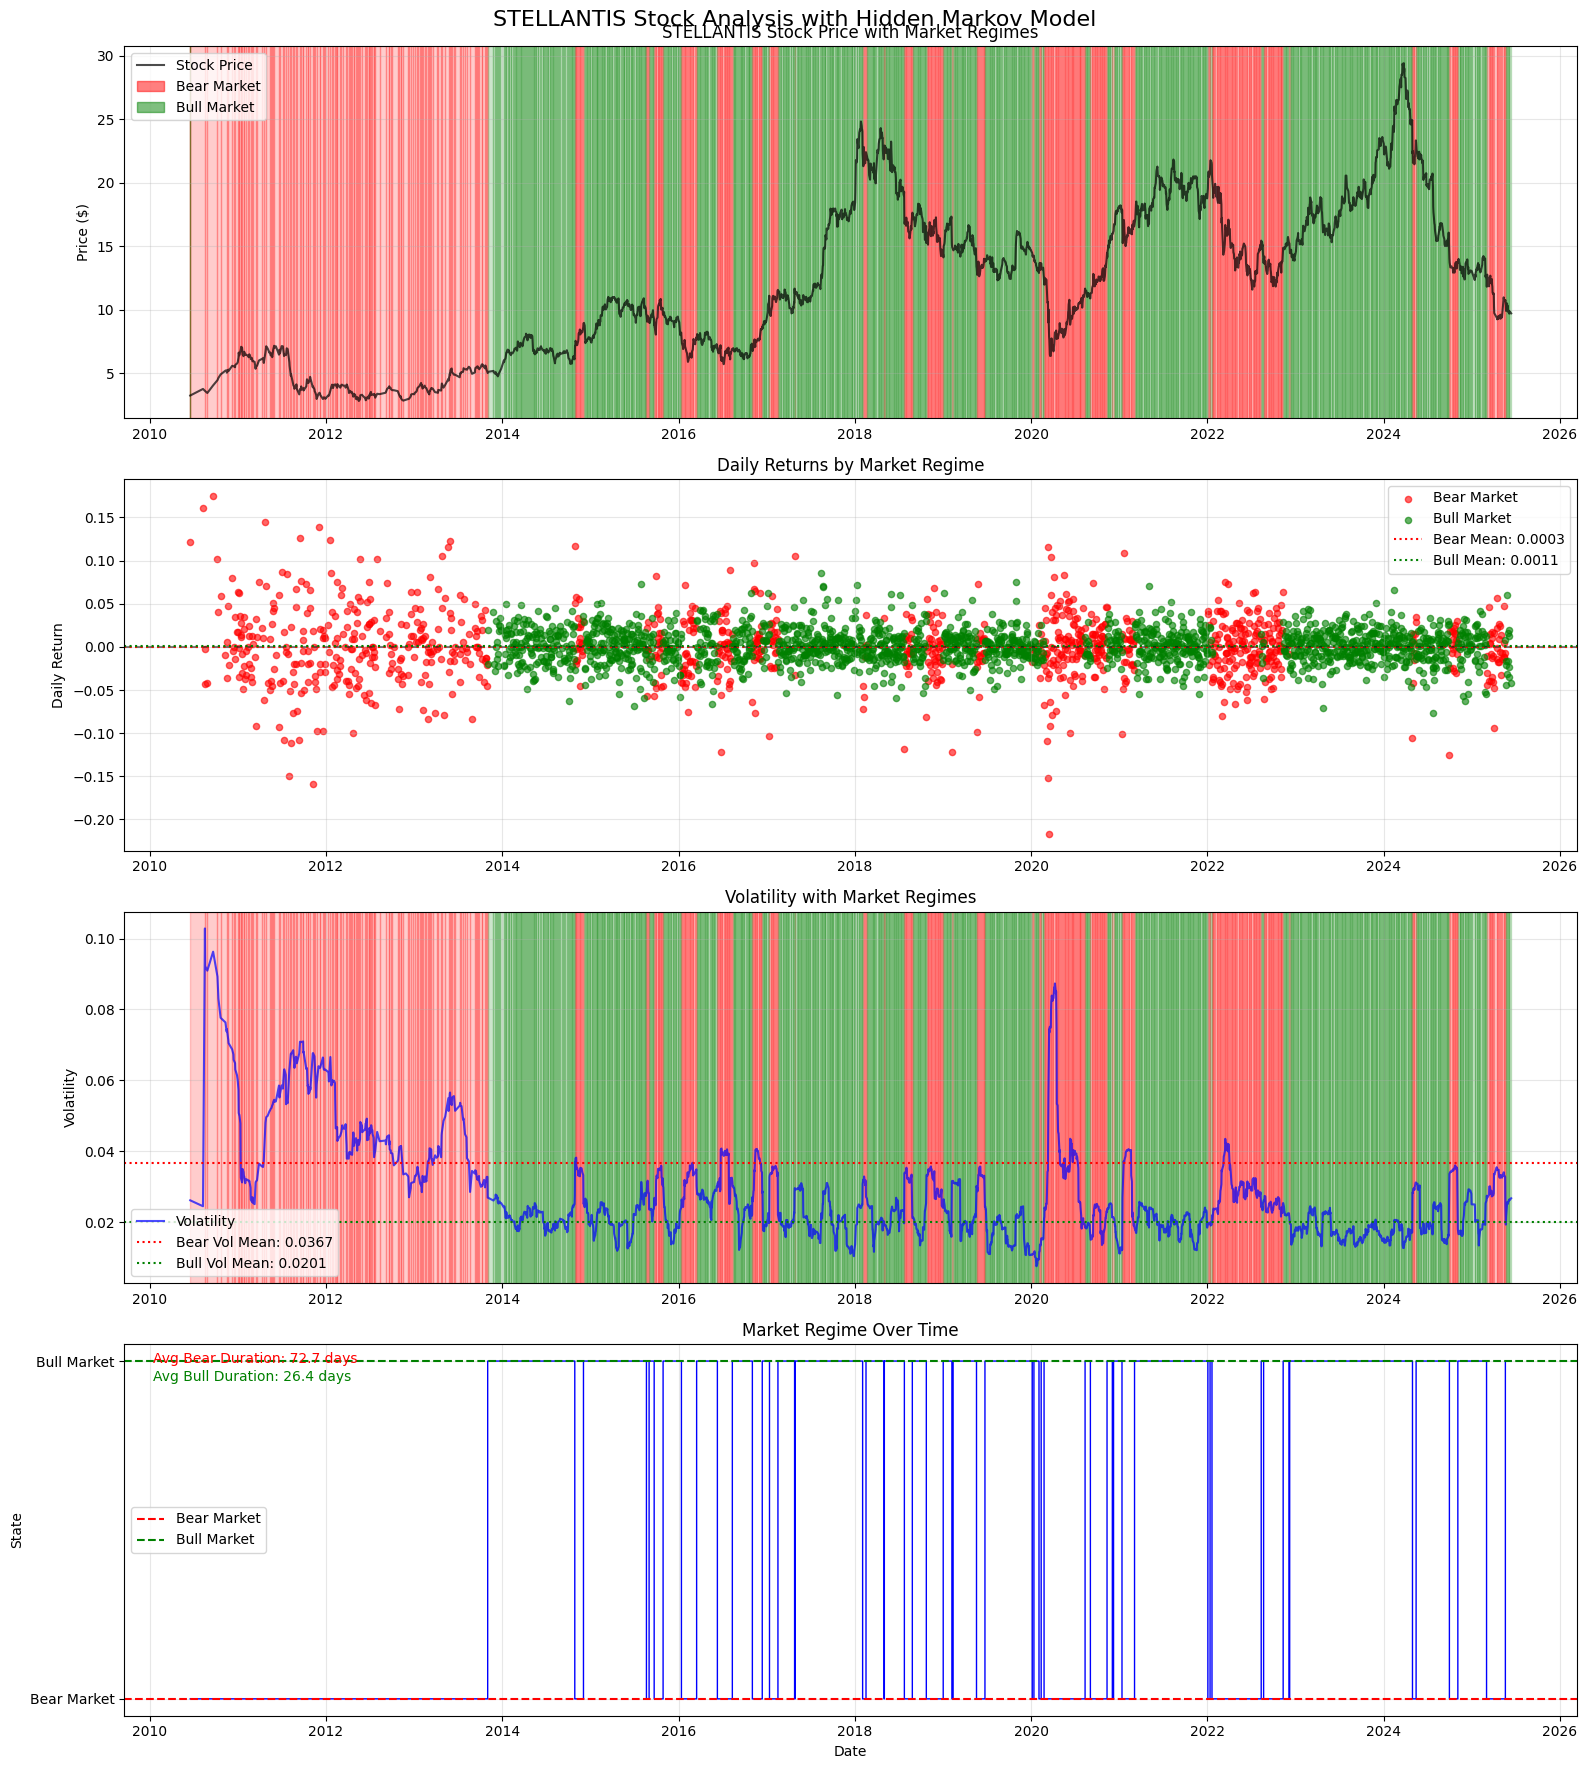

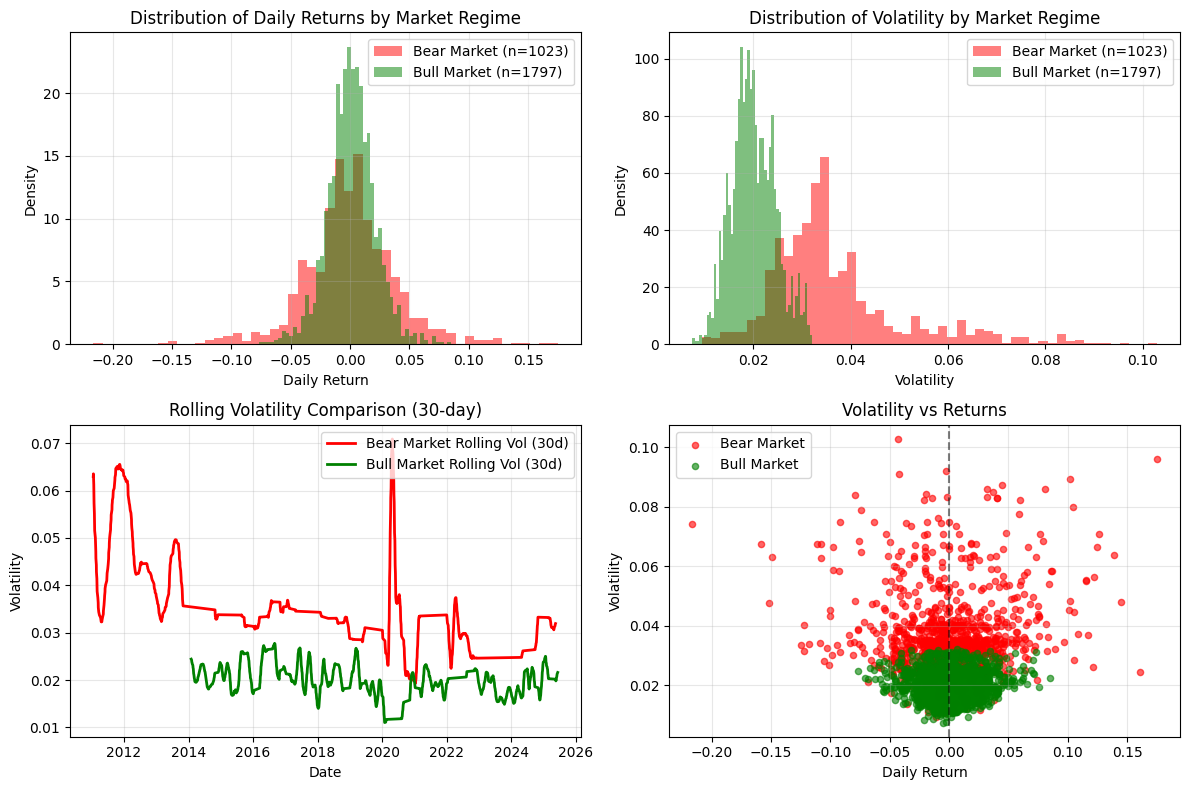

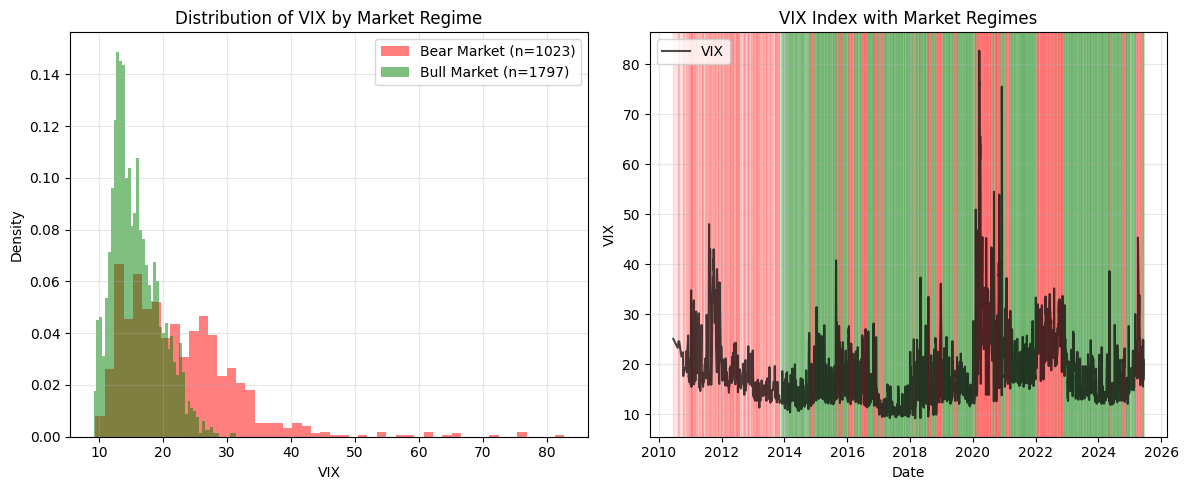


✅ Analysis completed successfully!
📊 Processed 2820 trading days


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import logsumexp
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

class StellantisHMM:
    def __init__(self, n_states=2):
        """
        Initialize the HMM with 2 states: Bull and Bear markets.
        """
        self.n_states = n_states
        self.transition_matrix = None
        self.emission_means = None
        self.emission_stds = None
        self.initial_probs = None
        self.state_names = ['Bear Market', 'Bull Market']

        # Regularization parameters
        self.min_std = 0.005
        self.transition_smoothing = 0.01
        self.emission_regularization = 1e-6

    def load_data(self, stla_file_path, vix_file_path=None):
      """Load and preprocess STLA stock data and VIX data."""
      print("📈 Loading data...")

      # Load STLA data
      try:
          stla_data = pd.read_excel(stla_file_path, header=0)
          print(f"✅ Loaded STLA data with {len(stla_data)} rows")
          print(f"Columns: {list(stla_data.columns)}")

          # Convert all columns to numeric where possible
          for col in stla_data.columns:
              if col != 'Date':  # Skip date column for now
                  stla_data[col] = pd.to_numeric(stla_data[col], errors='coerce')

          # Process STLA data
          date_cols = [col for col in stla_data.columns if any(word in str(col).lower() for word in ['date', 'time', 'day'])]
          if date_cols:
              print(f"Date column found: {date_cols[0]}")
              # Try different date formats for STLA data
              try:
                  stla_data[date_cols[0]] = pd.to_datetime(stla_data[date_cols[0]], format='%b %d, %Y', errors='coerce')
              except:
                  try:
                      stla_data[date_cols[0]] = pd.to_datetime(stla_data[date_cols[0]], errors='coerce')
                  except Exception as e:
                      print(f"Error parsing STLA dates: {str(e)}")
                      raise

              print(f"Unique dates before conversion: {stla_data[date_cols[0]].nunique()}")
              stla_data = stla_data.dropna(subset=[date_cols[0]])  # Drop rows with invalid dates
              stla_data.set_index(date_cols[0], inplace=True)
              stla_data.sort_index(inplace=True)  # Ensure chronological order
              print(f"STLA data after date conversion:\n{stla_data.head()}")
              print(f"Unique dates after conversion: {stla_data.index.nunique()}")
              print(f"STLA data date range: {stla_data.index.min()} to {stla_data.index.max()}")
          else:
              print("⚠️  No date column detected, using row index")

          price_cols = [col for col in stla_data.columns if any(word in str(col).lower() for word in ['close', 'price'])]
          if price_cols:
              stla_data['Close'] = stla_data[price_cols[0]]
          else:
              print("Available columns:", stla_data.columns)
              raise ValueError("No suitable price column found")

          # Ensure Close and Volume are numeric
          stla_data['Close'] = pd.to_numeric(stla_data['Close'], errors='coerce')
          if 'Volume' in stla_data.columns:
              stla_data['Volume'] = pd.to_numeric(stla_data['Volume'], errors='coerce')

          # Calculate returns and clean data
          stla_data['Returns'] = stla_data['Close'].pct_change()
          stla_data['LogReturns'] = np.log(stla_data['Close'] / stla_data['Close'].shift(1))
          stla_data = stla_data.replace([np.inf, -np.inf], np.nan).dropna()
          stla_data = stla_data[stla_data['Close'] > 0]
          print(f"STLA data after processing:\n{stla_data.head()}")
          print(f"STLA data shape after processing: {stla_data.shape}")

          # Normalize STLA dates to remove time component if any
          stla_data.index = pd.to_datetime(stla_data.index).normalize()
          print(f"Normalized STLA date range: {stla_data.index.min()} to {stla_data.index.max()}")

      except Exception as e:
          print(f"❌ Error loading STLA data: {str(e)}")
          raise

      # Load VIX data if available
      if vix_file_path:
          try:
              vix_data = pd.read_excel(vix_file_path, header=0)
              print(f"✅ Loaded VIX data with {len(vix_data)} rows")
              print(f"Columns: {list(vix_data.columns)}")
              print(f"VIX data before processing:\n{vix_data.head()}")

              # Convert all columns to numeric where possible
              for col in vix_data.columns:
                  if col != 'Date':  # Skip date column for now
                      vix_data[col] = pd.to_numeric(vix_data[col], errors='coerce')

              # Process VIX data
              vix_date_cols = [col for col in vix_data.columns if any(word in str(col).lower() for word in ['date', 'time', 'day'])]
              if vix_date_cols:
                  print(f"VIX date column found: {vix_date_cols[0]}")
                  # Try different date formats for VIX data
                  try:
                      # First try parsing with multiple formats
                      vix_data[vix_date_cols[0]] = pd.to_datetime(vix_data[vix_date_cols[0]],
                                                              format='mixed',
                                                              errors='coerce')
                  except:
                      try:
                          # If mixed format doesn't work, try specific formats
                          def parse_date(date_str):
                              try:
                                  return pd.to_datetime(date_str, format='%m/%d/%Y').normalize()
                              except:
                                  try:
                                      return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S').normalize()
                                  except:
                                      try:
                                          return pd.to_datetime(date_str, format='%b %d, %Y').normalize()
                                      except:
                                          try:
                                              return pd.to_datetime(date_str, format='%Y-%m-%d').normalize()
                                          except:
                                              return pd.NaT

                          vix_data[vix_date_cols[0]] = vix_data[vix_date_cols[0]].apply(parse_date)
                      except Exception as e:
                          print(f"Error parsing VIX dates: {str(e)}")
                          raise

                  print(f"Unique VIX dates before conversion: {vix_data[vix_date_cols[0]].nunique()}")
                  vix_data = vix_data.dropna(subset=[vix_date_cols[0]])  # Drop rows with invalid dates
                  vix_data.set_index(vix_date_cols[0], inplace=True)
                  vix_data.sort_index(inplace=True)  # Ensure chronological order
                  print(f"VIX data after date conversion:\n{vix_data.head()}")
                  print(f"Unique VIX dates after conversion: {vix_data.index.nunique()}")
                  print(f"VIX data date range: {vix_data.index.min()} to {vix_data.index.max()}")

              vix_value_cols = [col for col in vix_data.columns if any(word in str(col).lower() for word in ['vix', 'close', 'price'])]
              if vix_value_cols:
                  vix_data['VIX'] = vix_data[vix_value_cols[0]]
              else:
                  print("No VIX column found in VIX data")
                  vix_data['VIX'] = np.nan

              # Normalize VIX dates to remove time component if any
              vix_data.index = pd.to_datetime(vix_data.index).normalize()
              print(f"Normalized VIX date range: {vix_data.index.min()} to {vix_data.index.max()}")

              # Check if VIX data has valid values
              valid_vix = vix_data['VIX'].notna().sum()
              print(f"Number of valid VIX values before merging: {valid_vix}")

              # Check date format consistency
              print("STLA index dtype:", stla_data.index.dtype)
              print("VIX index dtype:", vix_data.index.dtype)

              # Print some date samples to verify alignment
              print("\nSTLA date samples:")
              print(stla_data.index[:10])
              print("\nVIX date samples:")
              print(vix_data.index[:10])

              # Find overlapping date range
              start_date = max(stla_data.index.min(), vix_data.index.min())
              end_date = min(stla_data.index.max(), vix_data.index.max())
              print(f"\nPotential overlapping date range: {start_date} to {end_date}")

              # Create a list of all possible dates in the overlapping range
              all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

              # Check how many dates are present in each dataset
              stla_dates = set(stla_data.index)
              vix_dates = set(vix_data.index)
              common_dates = stla_dates.intersection(vix_dates)
              print(f"Number of common dates: {len(common_dates)}")

              # For debugging: Check if the VIX data actually contains values for the common dates
              if common_dates:
                  vix_common = vix_data.loc[list(common_dates)]
                  valid_vix_common = vix_common['VIX'].notna().sum()
                  print(f"Number of valid VIX values in common dates: {valid_vix_common}")

                  # If we have some valid VIX values, proceed with merge
                  if valid_vix_common > 0:
                      print("Merging with valid VIX data...")
                      # Create a copy of stla_data with only the common dates
                      stla_common = stla_data.loc[list(common_dates)]
                      vix_common = vix_data.loc[list(common_dates)]

                      # Now merge
                      stla_data = stla_common.join(vix_common[['VIX']], how='left')

                      # CRITICAL FIX: Sort the merged data by date to ensure chronological order
                      stla_data.sort_index(inplace=True)
                      print(f"Merged data sorted by date. New date range: {stla_data.index.min()} to {stla_data.index.max()}")

                      # Forward fill any remaining missing VIX values (but limit to avoid filling too many)
                      stla_data['VIX'] = stla_data['VIX'].ffill(limit=5)  # Forward fill up to 5 days
                      stla_data['VIX'] = stla_data['VIX'].bfill(limit=5)  # Backward fill up to 5 days

                      # Count how many VIX values we actually have
                      vix_count = stla_data['VIX'].notna().sum()
                      print(f"Number of valid VIX values after merge: {vix_count}")
                  else:
                      print("Common dates found but no valid VIX values")
                      # Add VIX column with NaN values if it doesn't exist
                      if 'VIX' not in stla_data.columns:
                          stla_data['VIX'] = np.nan
              else:
                  print("No common dates between STLA and VIX data")
                  # Add VIX column with NaN values if it doesn't exist
                  if 'VIX' not in stla_data.columns:
                      stla_data['VIX'] = np.nan

              print(f"\nData after merging with VIX:\n{stla_data.head()}")

          except Exception as e:
              print(f"⚠️ Could not load VIX data: {str(e)}. Continuing without VIX.")
              if 'stla_data' in locals() and isinstance(stla_data, pd.DataFrame) and not stla_data.empty:
                  if 'VIX' not in stla_data.columns:
                      stla_data['VIX'] = np.nan
              else:
                  # If we couldn't load STLA data either, create empty dataframe
                  stla_data = pd.DataFrame()
      else:
          print("No VIX data file provided")
          if 'stla_data' in locals() and isinstance(stla_data, pd.DataFrame):
              if 'VIX' not in stla_data.columns:
                  stla_data['VIX'] = np.nan

      # If we don't have valid STLA data at this point, return empty arrays
      if stla_data.empty:
          return stla_data, np.array([])

      # Calculate additional features
      if not stla_data.empty:
          # Calculate volatility with a smaller window for the beginning of the dataset
          if len(stla_data) >= 2:  # Need at least 2 points to calculate returns and volatility
              stla_data['Volatility'] = stla_data['LogReturns'].rolling(21, min_periods=2).std()

              # Fill initial NaN values in volatility with the mean of available values
              if stla_data['Volatility'].isna().sum() > 0:
                  mean_vol = stla_data['Volatility'].mean()
                  if np.isnan(mean_vol):
                      mean_vol = 0.01  # Default small volatility if no values available
                  stla_data['Volatility'] = stla_data['Volatility'].fillna(mean_vol)

              if 'Volume' in stla_data.columns:
                  stla_data['VolumeChange'] = stla_data['Volume'].pct_change()

              # Determine observation columns - include VIX if we have enough valid values
              base_obs_cols = ['Returns', 'Volatility']
              if 'VIX' in stla_data.columns:
                  # Check if we have at least some valid VIX values
                  vix_count = stla_data['VIX'].notna().sum()
                  print(f"Number of non-NaN VIX values: {vix_count}")
                  if vix_count > 0 and vix_count/len(stla_data) > 0.1:  # If more than 10% of data has VIX
                      base_obs_cols.append('VIX')
                      print("Including VIX in observations")
                  else:
                      print("Excluding VIX from observations due to insufficient data")
                      stla_data['VIX'] = np.nan  # Ensure all are NaN if we're excluding it

              obs_cols = base_obs_cols

              print(f"\nSTLA data before dropping NaNs in observation columns:")
              print(stla_data.head())
              print(f"\nNumber of NaN values in each observation column before dropping:")
              for col in obs_cols:
                  nan_count = stla_data[col].isna().sum()
                  print(f"{col}: {nan_count}")

              # Drop rows with NaN values in observation columns
              initial_count = len(stla_data)
              stla_data = stla_data.dropna(subset=obs_cols)
              final_count = len(stla_data)
              print(f"\nDropped {initial_count - final_count} rows with NaN values in observation columns.")

              if not stla_data.empty:
                  observations = stla_data[obs_cols].values

                  print(f"\nSTLA data after feature calculation and NaN removal:")
                  print(stla_data.head())
                  print(f"Observations shape: {observations.shape}")
                  if observations.shape[0] > 0:
                      print(f"Observations sample:\n{observations[:5]}")
                  else:
                      print("No valid observations after preprocessing")
              else:
                  observations = np.array([])
                  print("No valid data after removing rows with NaN values in observation columns")
          else:
              observations = np.array([])
              print("Not enough data points to calculate returns and volatility")
      else:
          observations = np.array([])
          print("No valid data after initial processing")

      # If we have no observations but still have STLA data, try without VIX
      if observations.shape[0] == 0 and not stla_data.empty:
          print("\nAttempting to run analysis without VIX data...")
          obs_cols = ['Returns', 'Volatility']
          stla_data = stla_data.dropna(subset=obs_cols)
          if not stla_data.empty:
              observations = stla_data[obs_cols].values
              print(f"Successfully created observations without VIX. Shape: {observations.shape}")
          else:
              observations = np.array([])
              print("Still no valid observations after removing VIX requirement")

      print(f"📊 Final data shape: {observations.shape}")
      if hasattr(stla_data.index, 'strftime') and len(stla_data) > 0:
          print(f"📊 Date range: {stla_data.index[0].strftime('%Y-%m-%d')} to {stla_data.index[-1].strftime('%Y-%m-%d')}")
      else:
          print("No valid date range")

      return stla_data, observations

    def initialize_parameters(self, observations):
      """Initialize HMM parameters for multivariate observations with financial intuition."""
      print("\n🔧 Initializing HMM parameters with financial intuition...")

      # Extract the individual components for better initialization
      returns = observations[:, 0]
      volatility = observations[:, 1]

      # Use financial intuition to initialize states
      # Bull market: higher returns, lower volatility
      # Bear market: lower returns, higher volatility

      # Calculate percentiles for better initialization
      return_median = np.median(returns)
      vol_median = np.median(volatility)

      # Initialize based on financial logic rather than random clustering
      bull_mask = (returns > return_median) & (volatility < vol_median)
      bear_mask = (returns <= return_median) | (volatility >= vol_median)

      # If we have VIX data, use it to refine the initialization
      if observations.shape[1] > 2:
          vix = observations[:, 2]
          vix_median = np.median(vix)
          # Bull markets typically have lower VIX
          bull_mask = bull_mask & (vix < vix_median)
          # Bear markets typically have higher VIX
          bear_mask = bear_mask | (vix >= vix_median)

      # Ensure we have enough data points in each state
      bull_count = np.sum(bull_mask)
      bear_count = np.sum(bear_mask)

      print(f"  Initial state counts - Bull: {bull_count}, Bear: {bear_count}")

      if bull_count < 10 or bear_count < 10:
          print("  Warning: Not enough data points for proper initialization, using fallback")
          # Fallback to median-based split
          bull_mask = returns > return_median
          bear_mask = ~bull_mask

      # Initialize means and standard deviations based on our financial intuition
      self.emission_means = np.zeros((self.n_states, observations.shape[1]))
      self.emission_stds = np.zeros((self.n_states, observations.shape[1]))

      # State 0: Bear Market (should have lower returns, higher volatility/VIX)
      bear_data = observations[bear_mask]
      if len(bear_data) > 0:
          self.emission_means[0, :] = np.mean(bear_data, axis=0)
          self.emission_stds[0, :] = np.std(bear_data, axis=0)
      else:
          # Fallback values for bear market
          self.emission_means[0, :] = [return_median * 0.8, vol_median * 1.2]
          self.emission_stds[0, :] = [np.std(returns) * 1.2, np.std(volatility) * 1.2]

      # State 1: Bull Market (should have higher returns, lower volatility/VIX)
      bull_data = observations[bull_mask]
      if len(bull_data) > 0:
          self.emission_means[1, :] = np.mean(bull_data, axis=0)
          self.emission_stds[1, :] = np.std(bull_data, axis=0)
      else:
          # Fallback values for bull market
          self.emission_means[1, :] = [return_median * 1.2, vol_median * 0.8]
          self.emission_stds[1, :] = [np.std(returns) * 0.8, np.std(volatility) * 0.8]

      # If we have VIX data, set appropriate VIX values
      if observations.shape[1] > 2:
          vix_std = np.std(observations[:, 2])
          # Bear market typically has higher VIX
          self.emission_means[0, 2] = np.mean(observations[:, 2]) * 1.2
          self.emission_stds[0, 2] = vix_std * 1.2
          # Bull market typically has lower VIX
          self.emission_means[1, 2] = np.mean(observations[:, 2]) * 0.8
          self.emission_stds[1, 2] = vix_std * 0.8

      # Ensure minimum standard deviation
      self.emission_stds = np.maximum(self.emission_stds, self.min_std)

      # Initialize transition matrix with financial intuition
      # Markets tend to persist in their current state
      persistence = 0.95  # High probability of staying in same state
      self.transition_matrix = np.array([
          [persistence, 1 - persistence],  # Bear -> Bear, Bear -> Bull
          [1 - persistence, persistence]   # Bull -> Bear, Bull -> Bull
      ])

      # Initial probabilities - slightly favor bull market for long-term average
      self.initial_probs = np.array([0.4, 0.6])  # 40% Bear, 60% Bull

      # Print initialization with financial context
      print("\n  Financial Intuition Initialization:")
      for i in range(self.n_states):
          print(f"  State {i} ({self.state_names[i]}):")
          print(f"    Mean returns: {self.emission_means[i, 0]:+.6f}")
          print(f"    Mean volatility: {self.emission_means[i, 1]:.6f}")
          if observations.shape[1] > 2:
              print(f"    Mean VIX: {self.emission_means[i, 2]:.2f}")

      print(f"\n  Initial Transition Matrix:")
      print(f"    P(Bear → Bear): {self.transition_matrix[0, 0]:.3f}, P(Bear → Bull): {self.transition_matrix[0, 1]:.3f}")
      print(f"    P(Bull → Bear): {self.transition_matrix[1, 0]:.3f}, P(Bull → Bull): {self.transition_matrix[1, 1]:.3f}")

    def multivariate_emission_log_prob(self, observation, state):
        """Calculate log probability for multivariate observations."""
        mean = self.emission_means[state, :]
        std = self.emission_stds[state, :]

        # Handle extreme values
        if np.any(np.isnan(observation)) or np.any(np.isnan(mean)) or np.any(std <= 0):
            return -1000

        # Calculate log probability for each dimension
        log_probs = []
        for i in range(len(observation)):
            try:
                log_prob = -0.5 * np.log(2 * np.pi * std[i]**2) - 0.5 * ((observation[i] - mean[i]) / std[i])**2
                log_probs.append(max(log_prob, -50))
            except:
                return -1000

        return sum(log_probs)

    def forward_algorithm(self, observations):
        """Forward algorithm for multivariate observations."""
        T = len(observations)
        log_alpha = np.zeros((T, self.n_states))

        # Initialize
        for s in range(self.n_states):
            log_alpha[0, s] = np.log(self.initial_probs[s] + 1e-10) + \
                            self.multivariate_emission_log_prob(observations[0], s)

        # Forward recursion
        for t in range(1, T):
            for s in range(self.n_states):
                log_probs = []
                for prev_s in range(self.n_states):
                    log_prob = log_alpha[t-1, prev_s] + \
                              np.log(self.transition_matrix[prev_s, s] + 1e-10) + \
                              self.multivariate_emission_log_prob(observations[t], s)
                    log_probs.append(log_prob)

                log_alpha[t, s] = logsumexp(log_probs)

        # Calculate log-likelihood
        log_likelihood = logsumexp(log_alpha[T-1, :])
        return log_alpha, log_likelihood

    def backward_algorithm(self, observations):
        """Backward algorithm for multivariate observations."""
        T = len(observations)
        log_beta = np.zeros((T, self.n_states))

        # Initialize
        log_beta[T-1, :] = 0

        # Backward recursion
        for t in range(T-2, -1, -1):
            for s in range(self.n_states):
                log_probs = []
                for next_s in range(self.n_states):
                    log_prob = log_beta[t+1, next_s] + \
                              np.log(self.transition_matrix[s, next_s] + 1e-10) + \
                              self.multivariate_emission_log_prob(observations[t+1], next_s)
                    log_probs.append(log_prob)

                log_beta[t, s] = logsumexp(log_probs)

        return log_beta

    def viterbi_algorithm(self, observations):
        """Viterbi algorithm for most likely state sequence."""
        T = len(observations)
        log_delta = np.zeros((T, self.n_states))
        psi = np.zeros((T, self.n_states), dtype=int)

        # Initialize
        for s in range(self.n_states):
            log_delta[0, s] = np.log(self.initial_probs[s] + 1e-10) + \
                            self.multivariate_emission_log_prob(observations[0], s)

        # Recursion
        for t in range(1, T):
            for s in range(self.n_states):
                candidates = []
                for prev_s in range(self.n_states):
                    candidate = log_delta[t-1, prev_s] + \
                              np.log(self.transition_matrix[prev_s, s] + 1e-10)
                    candidates.append(candidate)

                psi[t, s] = np.argmax(candidates)
                log_delta[t, s] = max(candidates) + self.multivariate_emission_log_prob(observations[t], s)

        # Backtrack
        states = np.zeros(T, dtype=int)
        states[T-1] = np.argmax(log_delta[T-1, :])

        for t in range(T-2, -1, -1):
            states[t] = psi[t+1, states[t+1]]

        return states

    def calculate_expectations(self, observations, log_alpha, log_beta):
        """Calculate state and transition expectations."""
        T = len(observations)
        gamma = np.zeros((T, self.n_states))
        xi = np.zeros((T-1, self.n_states, self.n_states))

        # Calculate gamma
        for t in range(T):
            log_gamma_unnorm = log_alpha[t, :] + log_beta[t, :]
            log_normalizer = logsumexp(log_gamma_unnorm)
            gamma[t, :] = np.exp(log_gamma_unnorm - log_normalizer)

        # Calculate xi
        for t in range(T-1):
            log_xi_unnorm = np.zeros((self.n_states, self.n_states))

            for i in range(self.n_states):
                for j in range(self.n_states):
                    log_xi_unnorm[i, j] = log_alpha[t, i] + \
                                         np.log(self.transition_matrix[i, j] + 1e-10) + \
                                         self.multivariate_emission_log_prob(observations[t+1], j) + \
                                         log_beta[t+1, j]

            log_normalizer = logsumexp(log_xi_unnorm.flatten())
            xi[t, :, :] = np.exp(log_xi_unnorm - log_normalizer)

        return gamma, xi

    def update_parameters(self, observations, gamma, xi):
        """Update HMM parameters with regularization."""
        T = len(observations)

        # Update initial probabilities
        self.initial_probs = gamma[0, :] + self.emission_regularization
        self.initial_probs /= np.sum(self.initial_probs)

        # Update transition probabilities
        for i in range(self.n_states):
            denominator = np.sum(gamma[:-1, i]) + self.transition_smoothing * self.n_states
            for j in range(self.n_states):
                numerator = np.sum(xi[:, i, j]) + self.transition_smoothing
                self.transition_matrix[i, j] = numerator / denominator

        # Normalize transition matrix
        for i in range(self.n_states):
            row_sum = np.sum(self.transition_matrix[i, :])
            if row_sum > 1e-10:
                self.transition_matrix[i, :] /= row_sum

        # Update emission parameters
        for s in range(self.n_states):
            weights = gamma[:, s]
            weight_sum = np.sum(weights)

            if weight_sum > 1e-6:
                # Update means
                for dim in range(observations.shape[1]):
                    self.emission_means[s, dim] = np.sum(weights * observations[:, dim]) / weight_sum

                # Update standard deviations
                for dim in range(observations.shape[1]):
                    squared_diffs = (observations[:, dim] - self.emission_means[s, dim]) ** 2
                    variance = np.sum(weights * squared_diffs) / weight_sum
                    self.emission_stds[s, dim] = max(np.sqrt(variance), self.min_std)

    def baum_welch_algorithm(self, observations, max_iterations=50, tolerance=1e-4):
        """Baum-Welch algorithm for multivariate observations."""
        print(f"\n🤖 Training HMM using Baum-Welch algorithm...")
        print(f"   Maximum iterations: {max_iterations}")
        print(f"   Convergence tolerance: {tolerance}")

        prev_log_likelihood = -np.inf

        for iteration in range(max_iterations):
            # E-step
            log_alpha, log_likelihood = self.forward_algorithm(observations)
            log_beta = self.backward_algorithm(observations)
            gamma, xi = self.calculate_expectations(observations, log_alpha, log_beta)

            # M-step
            self.update_parameters(observations, gamma, xi)

            # Check convergence
            improvement = log_likelihood - prev_log_likelihood

            if iteration < 10 or iteration % 10 == 0:
                print(f"   Iteration {iteration:2d}: Log-likelihood = {log_likelihood:.2f} (Δ = {improvement:+.4f})")

            if improvement < tolerance and iteration >= 5:
                print(f"   ✅ Converged after {iteration+1} iterations")
                break

            prev_log_likelihood = log_likelihood
        else:
            print(f"   ⏰ Reached maximum iterations")

        print(f"   📊 Final log-likelihood: {prev_log_likelihood:.2f}")
        return prev_log_likelihood

    def analyze_stellantis(self, stla_file_path, vix_file_path=None):
      """Complete analysis pipeline with multivariate observations."""
      print("🏭 STELLANTIS N.V. (STLA) HIDDEN MARKOV MODEL ANALYSIS")
      print("=" * 55)

      # Load data
      data, observations = self.load_data(stla_file_path, vix_file_path)

      if observations.shape[0] == 0:
          if data.empty:
              raise ValueError("No valid observations found after preprocessing. The data appears to be empty. Check your input data.")
          else:
              # Check which columns have NaN values
              nan_counts = data.isna().sum()
              print("NaN counts in each column:")
              print(nan_counts)

              # Check if any observation columns are completely NaN
              obs_cols = ['Returns', 'Volatility']
              if 'VIX' in data.columns and data['VIX'].notna().sum() > 0:
                  obs_cols.append('VIX')

              missing_cols = [col for col in obs_cols if col in nan_counts and nan_counts[col] == len(data)]
              if missing_cols:
                  raise ValueError(f"No valid observations found after preprocessing. The following observation columns are completely empty: {', '.join(missing_cols)}")
              else:
                  raise ValueError("No valid observations found after preprocessing. All observation columns contain NaN values after processing. Check your input data.")

      # Check what observation columns we actually have
      obs_cols = ['Returns', 'Volatility']
      if len(observations.shape) > 1 and observations.shape[1] > 2:  # If we have more than 2 columns
          obs_cols.append('VIX')

      # If we still have VIX in obs_cols but all values are NaN, remove it
      if 'VIX' in obs_cols and np.all(np.isnan(data['VIX'])):
          obs_cols.remove('VIX')
          observations = data[obs_cols].values
          print("Note: Removed VIX from observations since all values are NaN")

      print(f"Using observation columns: {obs_cols}")

      # If we have 0 observations at this point, try without VIX
      if observations.shape[0] == 0 and len(obs_cols) > 2:
          print("\nAttempting analysis without VIX data...")
          obs_cols = ['Returns', 'Volatility']
          observations = data[obs_cols].values
          print(f"Now have {observations.shape[0]} observations without VIX")

      if observations.shape[0] == 0:
          raise ValueError("No valid observations found after preprocessing. Check your input data.")

      # Initialize and train model
      self.initialize_parameters(observations)
      self.baum_welch_algorithm(observations)

      # Identify regimes
      print(f"\n🔍 Identifying market regimes using Viterbi algorithm...")
      states = self.viterbi_algorithm(observations)

      # Add states to data
      data['State'] = states
      data['Regime'] = [self.state_names[s] for s in states]

      # Print results
      self.print_model_parameters()
      self.analyze_results(data, observations, states)
      self.plot_analysis(data, observations, states)

      return data, states

    def print_model_parameters(self):
      """Print learned parameters."""
      print(f"\n📊 LEARNED MODEL PARAMETERS")
      print("=" * 35)

      print("\n🎯 Hidden States (Market Regimes):")
      for i in range(self.n_states):
          print(f"  State {i} - {self.state_names[i]}:")
          print(f"    Mean returns: {self.emission_means[i, 0]:+.4f}")
          print(f"    Mean volatility: {self.emission_means[i, 1]:.4f}")
          if self.emission_means.shape[1] > 2:
              print(f"    Mean VIX: {self.emission_means[i, 2]:.1f}")
          print(f"    Return std: {self.emission_stds[i, 0]:.4f}")
          print(f"    Volatility std: {self.emission_stds[i, 1]:.4f}")
          if self.emission_stds.shape[1] > 2:
              print(f"    VIX std: {self.emission_stds[i, 2]:.1f}")

      print(f"\n🔄 Transition Matrix:")
      print("   From\\To      Bear   Bull")
      for i in range(self.n_states):
          print(f"   {self.state_names[i][:10]:<12}", end="")
          for j in range(self.n_states):
              print(f"{self.transition_matrix[i,j]:>6.3f}", end="")
          print()

    def analyze_results(self, data, observations, states):
        """Analyze HMM results."""
        print(f"\n📈 MARKET REGIME ANALYSIS")
        print("=" * 25)

        for state in range(self.n_states):
            state_mask = states == state
            if np.sum(state_mask) > 0:
                state_data = data[state_mask]
                state_days = np.sum(state_mask)
                percentage = (state_days / len(states)) * 100

                print(f"\n🏷️  {self.state_names[state]} ({state_days} days, {percentage:.1f}%):")
                print(f"   Average daily return: {state_data['Returns'].mean():+.4f} ({state_data['Returns'].mean()*252:+.1f}% annual)")
                print(f"   Average volatility: {state_data['Volatility'].mean():.4f}")
                if 'VIX' in state_data.columns:
                    print(f"   Average VIX: {state_data['VIX'].mean():.1f}")

        # Recent analysis
        recent_states = states[-30:] if len(states) >= 30 else states[-10:]
        if len(recent_states) > 0:
            recent_state = np.bincount(recent_states).argmax()
            print(f"\n🕒 Recent Market Regime:")
            print(f"   Dominant state: {self.state_names[recent_state]}")

    def plot_analysis(self, data, observations, states):
        """Create improved visualizations of the analysis."""
        if len(data) == 0:
            print("No data to plot")
            return

        # Create a figure with multiple subplots
        fig = plt.figure(figsize=(16, 18))
        fig.suptitle('STELLANTIS Stock Analysis with Hidden Markov Model', fontsize=16, y=0.98)

        # Define colors for the states
        colors = ['red', 'green']
        state_colors = [colors[state] for state in states]

        # 1. Stock Price with Market Regimes
        ax1 = plt.subplot(4, 1, 1)

        # Sort data by date to ensure continuous line
        data = data.sort_index()

        # Plot the stock price as a single continuous line
        ax1.plot(data.index, data['Close'], 'k-', linewidth=1.5, alpha=0.7, label='Stock Price')

        # Create a color map for the background to show market regimes
        # Use a subsample of dates to avoid too many spans
        sample_step = max(1, len(data) // 1000)
        for i in range(0, len(data), sample_step):
            ax1.axvspan(data.index[i], data.index[min(i+sample_step, len(data)-1)],
                      color=state_colors[i], alpha=0.2)

        ax1.set_title('STELLANTIS Stock Price with Market Regimes', fontsize=12)
        ax1.set_ylabel('Price ($)')
        ax1.grid(True, alpha=0.3)

        # Create legend
        for i, (color, name) in enumerate(zip(colors, self.state_names)):
            ax1.axvspan(data.index[0], data.index[0] + pd.Timedelta(days=1),
                      color=color, alpha=0.5, label=name)
        ax1.legend(loc='upper left')

        # 2. Daily Returns by Market Regime
        ax2 = plt.subplot(4, 1, 2)

        # Create masks for each state
        bear_mask = states == 0
        bull_mask = states == 1

        # Plot returns with different markers for each state
        ax2.scatter(data.index[bear_mask], data['Returns'][bear_mask],
                  color=colors[0], alpha=0.6, s=20, label='Bear Market')
        ax2.scatter(data.index[bull_mask], data['Returns'][bull_mask],
                  color=colors[1], alpha=0.6, s=20, label='Bull Market')

        ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax2.set_title('Daily Returns by Market Regime', fontsize=12)
        ax2.set_ylabel('Daily Return')
        ax2.grid(True, alpha=0.3)
        ax2.legend()

        # Add mean return lines for each state
        bear_mean = data['Returns'][bear_mask].mean()
        bull_mean = data['Returns'][bull_mask].mean()
        ax2.axhline(y=bear_mean, color=colors[0], linestyle=':', label=f'Bear Mean: {bear_mean:.4f}')
        ax2.axhline(y=bull_mean, color=colors[1], linestyle=':', label=f'Bull Mean: {bull_mean:.4f}')
        ax2.legend()

        # 3. Volatility Analysis with Market Regimes
        ax3 = plt.subplot(4, 1, 3)

        # Plot volatility as a line
        ax3.plot(data.index, data['Volatility'], 'b-', linewidth=1.5, alpha=0.7, label='Volatility')

        # Create a color map for the background to show market regimes
        for i in range(0, len(data), sample_step):
            ax3.axvspan(data.index[i], data.index[min(i+sample_step, len(data)-1)],
                      color=state_colors[i], alpha=0.2)

        ax3.set_title('Volatility with Market Regimes', fontsize=12)
        ax3.set_ylabel('Volatility')
        ax3.grid(True, alpha=0.3)

        # Add mean volatility lines for each state
        bear_vol_mean = data['Volatility'][bear_mask].mean()
        bull_vol_mean = data['Volatility'][bull_mask].mean()
        ax3.axhline(y=bear_vol_mean, color=colors[0], linestyle=':',
                    label=f'Bear Vol Mean: {bear_vol_mean:.4f}')
        ax3.axhline(y=bull_vol_mean, color=colors[1], linestyle=':',
                    label=f'Bull Vol Mean: {bull_vol_mean:.4f}')
        ax3.legend()

        # 4. Market Regime Over Time
        ax4 = plt.subplot(4, 1, 4)

        # Plot the state sequence with steps
        ax4.step(data.index, states, where='post', color='blue', linewidth=1)

        # Add horizontal lines for each state
        ax4.axhline(y=0, color=colors[0], linestyle='--', label='Bear Market')
        ax4.axhline(y=1, color=colors[1], linestyle='--', label='Bull Market')

        ax4.set_title('Market Regime Over Time', fontsize=12)
        ax4.set_ylabel('State')
        ax4.set_xlabel('Date')
        ax4.set_yticks([0, 1])
        ax4.set_yticklabels(self.state_names)
        ax4.grid(True, alpha=0.3)
        ax4.legend()

        # Calculate regime durations more safely
        try:
            # Find where the state changes
            regime_changes = np.where(np.diff(states) != 0)[0]
            if len(regime_changes) > 0:
                # Add start and end points
                change_points = np.concatenate(([0], regime_changes, [len(states)]))

                # Calculate durations
                regime_durations = np.diff(change_points)

                # Get the state for each duration
                regime_states = states[change_points[:-1]]

                # Calculate average duration for each state
                avg_bear_duration = np.mean(regime_durations[regime_states == 0]) if np.any(regime_states == 0) else 0
                avg_bull_duration = np.mean(regime_durations[regime_states == 1]) if np.any(regime_states == 1) else 0

                # Add text with average regime durations
                ax4.text(0.02, 0.95, f'Avg Bear Duration: {avg_bear_duration:.1f} days',
                        transform=ax4.transAxes, color=colors[0])
                ax4.text(0.02, 0.90, f'Avg Bull Duration: {avg_bull_duration:.1f} days',
                        transform=ax4.transAxes, color=colors[1])
            else:
                # If no changes, the entire period is one regime
                avg_duration = len(states)
                if states[0] == 0:
                    ax4.text(0.02, 0.95, f'Avg Bear Duration: {avg_duration:.1f} days',
                            transform=ax4.transAxes, color=colors[0])
                else:
                    ax4.text(0.02, 0.95, f'Avg Bull Duration: {avg_duration:.1f} days',
                            transform=ax4.transAxes, color=colors[1])
        except Exception as e:
            print(f"Error calculating regime durations: {e}")

        # Adjust layout
        plt.tight_layout()
        plt.show()

        # Additional plots
        self.plot_additional_analysis(data, bear_mask, bull_mask, colors)

    def plot_additional_analysis(self, data, bear_mask, bull_mask, colors):
        """Create additional analysis plots."""
        # 1. Distribution of returns by regime
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 2, 1)
        plt.hist(data['Returns'][bear_mask], bins=50, color=colors[0], alpha=0.5,
                label=f'Bear Market (n={bear_mask.sum()})', density=True)
        plt.hist(data['Returns'][bull_mask], bins=50, color=colors[1], alpha=0.5,
                label=f'Bull Market (n={bull_mask.sum()})', density=True)
        plt.title('Distribution of Daily Returns by Market Regime')
        plt.xlabel('Daily Return')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 2. Distribution of volatility by regime
        plt.subplot(2, 2, 2)
        plt.hist(data['Volatility'][bear_mask], bins=50, color=colors[0], alpha=0.5,
                label=f'Bear Market (n={bear_mask.sum()})', density=True)
        plt.hist(data['Volatility'][bull_mask], bins=50, color=colors[1], alpha=0.5,
                label=f'Bull Market (n={bull_mask.sum()})', density=True)
        plt.title('Distribution of Volatility by Market Regime')
        plt.xlabel('Volatility')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 3. Rolling volatility comparison
        plt.subplot(2, 2, 3)
        # Calculate 30-day rolling volatility for each regime
        bear_rolling_vol = data['Volatility'][bear_mask].rolling(30).mean()
        bull_rolling_vol = data['Volatility'][bull_mask].rolling(30).mean()

        plt.plot(data.index[bear_mask][29:], bear_rolling_vol[29:],
                color=colors[0], linewidth=2, label='Bear Market Rolling Vol (30d)')
        plt.plot(data.index[bull_mask][29:], bull_rolling_vol[29:],
                color=colors[1], linewidth=2, label='Bull Market Rolling Vol (30d)')
        plt.title('Rolling Volatility Comparison (30-day)')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 4. Volatility vs Returns scatter plot
        plt.subplot(2, 2, 4)
        plt.scatter(data['Returns'][bear_mask], data['Volatility'][bear_mask],
                    color=colors[0], alpha=0.6, s=20, label='Bear Market')
        plt.scatter(data['Returns'][bull_mask], data['Volatility'][bull_mask],
                    color=colors[1], alpha=0.6, s=20, label='Bull Market')
        plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
        plt.title('Volatility vs Returns')
        plt.xlabel('Daily Return')
        plt.ylabel('Volatility')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Additional plot: VIX by regime
        if 'VIX' in data.columns:
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            plt.hist(data['VIX'][bear_mask], bins=50, color=colors[0], alpha=0.5,
                    label=f'Bear Market (n={bear_mask.sum()})', density=True)
            plt.hist(data['VIX'][bull_mask], bins=50, color=colors[1], alpha=0.5,
                    label=f'Bull Market (n={bull_mask.sum()})', density=True)
            plt.title('Distribution of VIX by Market Regime')
            plt.xlabel('VIX')
            plt.ylabel('Density')
            plt.legend()
            plt.grid(True, alpha=0.3)

            plt.subplot(1, 2, 2)
            # Plot VIX over time with regime background
            plt.plot(data.index, data['VIX'], 'black', linewidth=1.5, alpha=0.7, label='VIX')

            # Add regime background
            sample_step = max(1, len(data) // 1000)
            state_colors = [colors[state] for state in data['State']]
            for i in range(0, len(data), sample_step):
                plt.axvspan(data.index[i], data.index[min(i+sample_step, len(data)-1)],
                          color=state_colors[i], alpha=0.1)

            plt.title('VIX Index with Market Regimes')
            plt.xlabel('Date')
            plt.ylabel('VIX')
            plt.legend()
            plt.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

def main():
    stla_file_path = "STLA data.xlsx"
    vix_file_path = "CBOE VIX.xlsx"
    try:
        hmm = StellantisHMM(n_states=2)
        print(f"📁 Loading data...")
        data, states = hmm.analyze_stellantis(stla_file_path, vix_file_path)

        print(f"\n Analysis completed successfully!")
        print(f"Processed {len(data)} trading days")

        return hmm, data, states

    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None

# Execute analysis
if __name__ == "__main__":
    hmm_model, stock_data, market_states = main()